In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import os
import scipy as sci
from sklearn import linear_model
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import summary_table
from pylab import rcParams
import seaborn as sns
from scipy import stats
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
import warnings
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 16, 9
pd.options.display.float_format = '{:.6f}'.format

Import DataFrame:

In [3]:
df = pd.read_csv("patient71522.csv")
df

patient  ICULOS        HR      O2Sat      Temp        SBP       MAP  \
0      p014977       3 80.000000 100.000000 36.500000 121.000000 58.000000   
1      p014977       4 76.000000 100.000000 36.250000 113.250000 61.000000   
2      p014977       5 80.000000 100.000000 36.250000 132.750000 71.500000   
3      p014977       6 78.000000 100.000000 36.100000 103.500000 58.000000   
4      p014977       7 74.000000 100.000000 36.000000 128.750000 69.500000   
...        ...     ...       ...        ...       ...        ...       ...   
54995  p001438      27 80.000000 100.000000 37.060000 133.000000 78.330000   
54996  p001438      28 89.000000 100.000000       NaN 131.000000 72.330000   
54997  p001438      29 88.000000 100.000000       NaN 133.000000 84.330000   
54998  p001438      30 98.000000  98.000000       NaN 110.000000 76.670000   
54999  p001438      31 83.000000 100.000000 36.720000 108.000000 60.670000   

            DBP      Resp  EtCO2  ...  Bilirubin_total  TroponinI       Hct  \
0     41.000000 13.500000    NaN  ...              NaN        NaN 27.900000   
1     41.500000 12.000000    NaN  ...              NaN        NaN 27.900000   
2     46.250000 12.000000    NaN  ...              NaN        NaN       NaN   
3     43.000000 12.000000    NaN  ...              NaN        NaN       NaN   
4     44.500000 12.500000    NaN  ...              NaN        NaN       NaN   
...         ...       ...    ...  ...              ...        ...       ...   
54995       NaN 22.000000    NaN  ...              NaN        NaN       NaN   
54996       NaN 29.000000    NaN  ...              NaN        NaN       NaN   
54997       NaN 27.000000    NaN  ...              NaN        NaN       NaN   
54998       NaN 26.000000    NaN  ...              NaN        NaN       NaN   
54999       NaN 33.000000    NaN  ...              NaN        NaN       NaN   

           Hgb       PTT      WBC  Fibrinogen  Platelets       Age  Gender  
0     8.800000 38.100000 9.900000  223.000000 160.000000 77.270000       1  
1     8.800000       NaN 9.900000         NaN        NaN 77.270000       1  
2          NaN       NaN      NaN         NaN        NaN 77.270000       1  
3          NaN       NaN      NaN         NaN        NaN 77.270000       1  
4          NaN       NaN      NaN         NaN        NaN 77.270000       1  
...        ...       ...      ...         ...        ...       ...     ...  
54995      NaN       NaN      NaN         NaN        NaN 70.890000       1  
54996      NaN       NaN      NaN         NaN        NaN 70.890000       1  
54997      NaN       NaN      NaN         NaN        NaN 70.890000       1  
54998      NaN       NaN      NaN         NaN        NaN 70.890000       1  
54999      NaN       NaN      NaN         NaN        NaN 70.890000       1  

[55000 rows x 38 columns]

In [4]:
df_condensed = df.groupby("patient").mean()
df_condensed.to_csv('out/condense.csv')

Condense DataFrame:
Index by patient and drop "ICULOS" column which represents timestamps per patient

In [5]:
df_condensed = df_condensed.drop(columns=["ICULOS"])
df_condensed.head()

HR     O2Sat      Temp        SBP       MAP       DBP  \
patient                                                                 
p000040  96.000000 98.050000 36.665000  92.340909 72.280455       NaN   
p000042 103.073770 96.918182 37.348182 117.562500 80.392857 60.434783   
p000043 119.190476 94.333333 35.742500  92.821429 74.194524       NaN   
p000054  90.836364 95.129630 36.339231 104.154545 65.963636 54.462963   
p000056  89.000000 96.187500 36.682500 134.375000 84.625000 62.875000   

             Resp  EtCO2  BaseExcess      HCO3  ...  Bilirubin_total  \
patient                                         ...                    
p000040 21.021739    NaN         NaN 23.500000  ...              NaN   
p000042 16.919355    NaN    1.250000 24.200000  ...         0.700000   
p000043 24.773810    NaN    6.500000 33.500000  ...         1.400000   
p000054 20.054545    NaN         NaN 24.000000  ...         0.750000   
p000056 15.937500    NaN         NaN 21.000000  ...              NaN   

         TroponinI       Hct       Hgb       PTT       WBC  Fibrinogen  \
patient                                                                  
p000040        NaN 29.550000  9.350000       NaN  8.400000         NaN   
p000042        NaN 29.835714  9.914286 28.540000 10.100000  652.000000   
p000043        NaN 33.900000  9.966667 29.133333  7.750000         NaN   
p000054        NaN 34.233333 11.200000 34.300000 18.200000         NaN   
p000056        NaN 21.100000  7.400000 22.500000 15.400000         NaN   

         Platelets       Age   Gender  
patient                                
p000040 332.000000 57.170000 1.000000  
p000042 368.833333 63.590000 0.000000  
p000043 345.000000 46.350000 0.000000  
p000054 544.666667 70.510000 1.000000  
p000056 167.000000 68.200000 1.000000  

[5 rows x 36 columns]

EDA:
Info shows many features have many nulls, will make method to find out percentage-wise

In [6]:
df_condensed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1411 entries, p000040 to p020635
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HR                1411 non-null   float64
 1   O2Sat             1411 non-null   float64
 2   Temp              1394 non-null   float64
 3   SBP               1401 non-null   float64
 4   MAP               1411 non-null   float64
 5   DBP               901 non-null    float64
 6   Resp              1410 non-null   float64
 7   EtCO2             0 non-null      float64
 8   BaseExcess        868 non-null    float64
 9   HCO3              1376 non-null   float64
 10  FiO2              828 non-null    float64
 11  pH                906 non-null    float64
 12  PaCO2             860 non-null    float64
 13  SaO2              551 non-null    float64
 14  AST               410 non-null    float64
 15  BUN               1383 non-null   float64
 16  Alkalinephos      400 non-null    floa

Gender is the only categorical piece of data, maybe ignore when performing imputation on numerical data

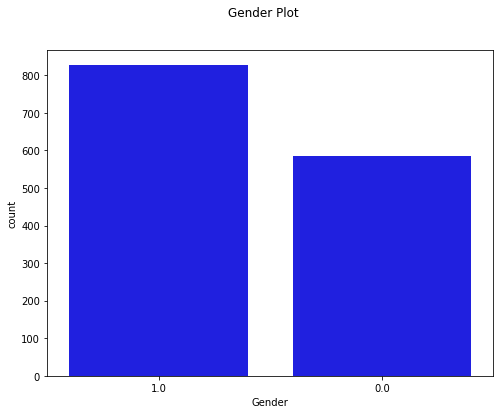

In [7]:
fig = plt.figure(figsize = (8, 6))

fig.suptitle('Gender Plot')

sns.countplot(x = 'Gender', data = df_condensed, color = 'blue', order = df_condensed['Gender'].value_counts().index);

In [8]:
#df_condensed = df_condensed.drop(columns="Gender")

See what percent of each column is null values

In [9]:
def amt_null(df):
    return ((df.isnull().sum() / df.shape[0])*100).sort_values()

percent_null = (df_condensed.isnull().sum() / df_condensed.shape[0])*100

In [10]:
percent_null.sort_values()

HR                   0.000000
Age                  0.000000
MAP                  0.000000
Gender               0.000000
O2Sat                0.000000
Resp                 0.070872
SBP                  0.708717
Temp                 1.204819
Glucose              1.984408
BUN                  1.984408
Hct                  2.126152
Potassium            2.267895
Creatinine           2.338767
HCO3                 2.480510
Chloride             2.551382
Hgb                  2.976612
WBC                  3.472714
Platelets            3.614458
Magnesium            6.165840
Phosphate           17.505315
Calcium             17.930546
PTT                 20.978030
pH                  35.790220
DBP                 36.144578
BaseExcess          38.483345
PaCO2               39.050319
FiO2                41.318214
SaO2                60.949681
Lactate             63.288448
AST                 70.942594
Alkalinephos        71.651311
Bilirubin_total     71.793055
Fibrinogen          85.825656
Bilirubin_

"EtCO2" has no non-null values, drop it

In [11]:
df_condensed = df_condensed.drop(columns=["EtCO2","Bilirubin_direct","TroponinI"])
percent_null = (df_condensed.isnull().sum() / df_condensed.shape[0])*100

Make method to check distribution of columns, make sure this doesn't significantly change after imputation

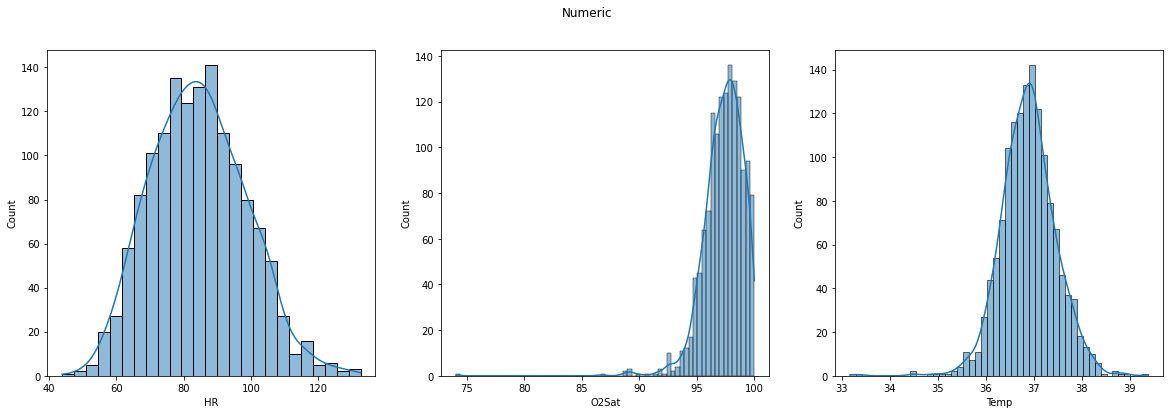

In [12]:
def before_after(col, df):
    fig, axes = plt.subplots(1, 2, figsize = (20, 6))
    fig.suptitle("Before and After")
    sns.histplot(x = col, data = df_condensed, kde = True, ax = axes[0]);
    sns.histplot(x = col, data = df, kde = True, ax = axes[1]);

fig, axes = plt.subplots(1, 3, figsize = (20, 6))
  
fig.suptitle('Numeric')
  
sns.histplot(x = 'HR', data = df_condensed, kde = True, ax = axes[0]);

sns.histplot(x='O2Sat', data = df_condensed, kde = True, ax = axes[1]);

sns.histplot(x='Temp', data = df_condensed, kde = True, ax = axes[2]);

Heatmap to show correlation between features, useful later for regression model

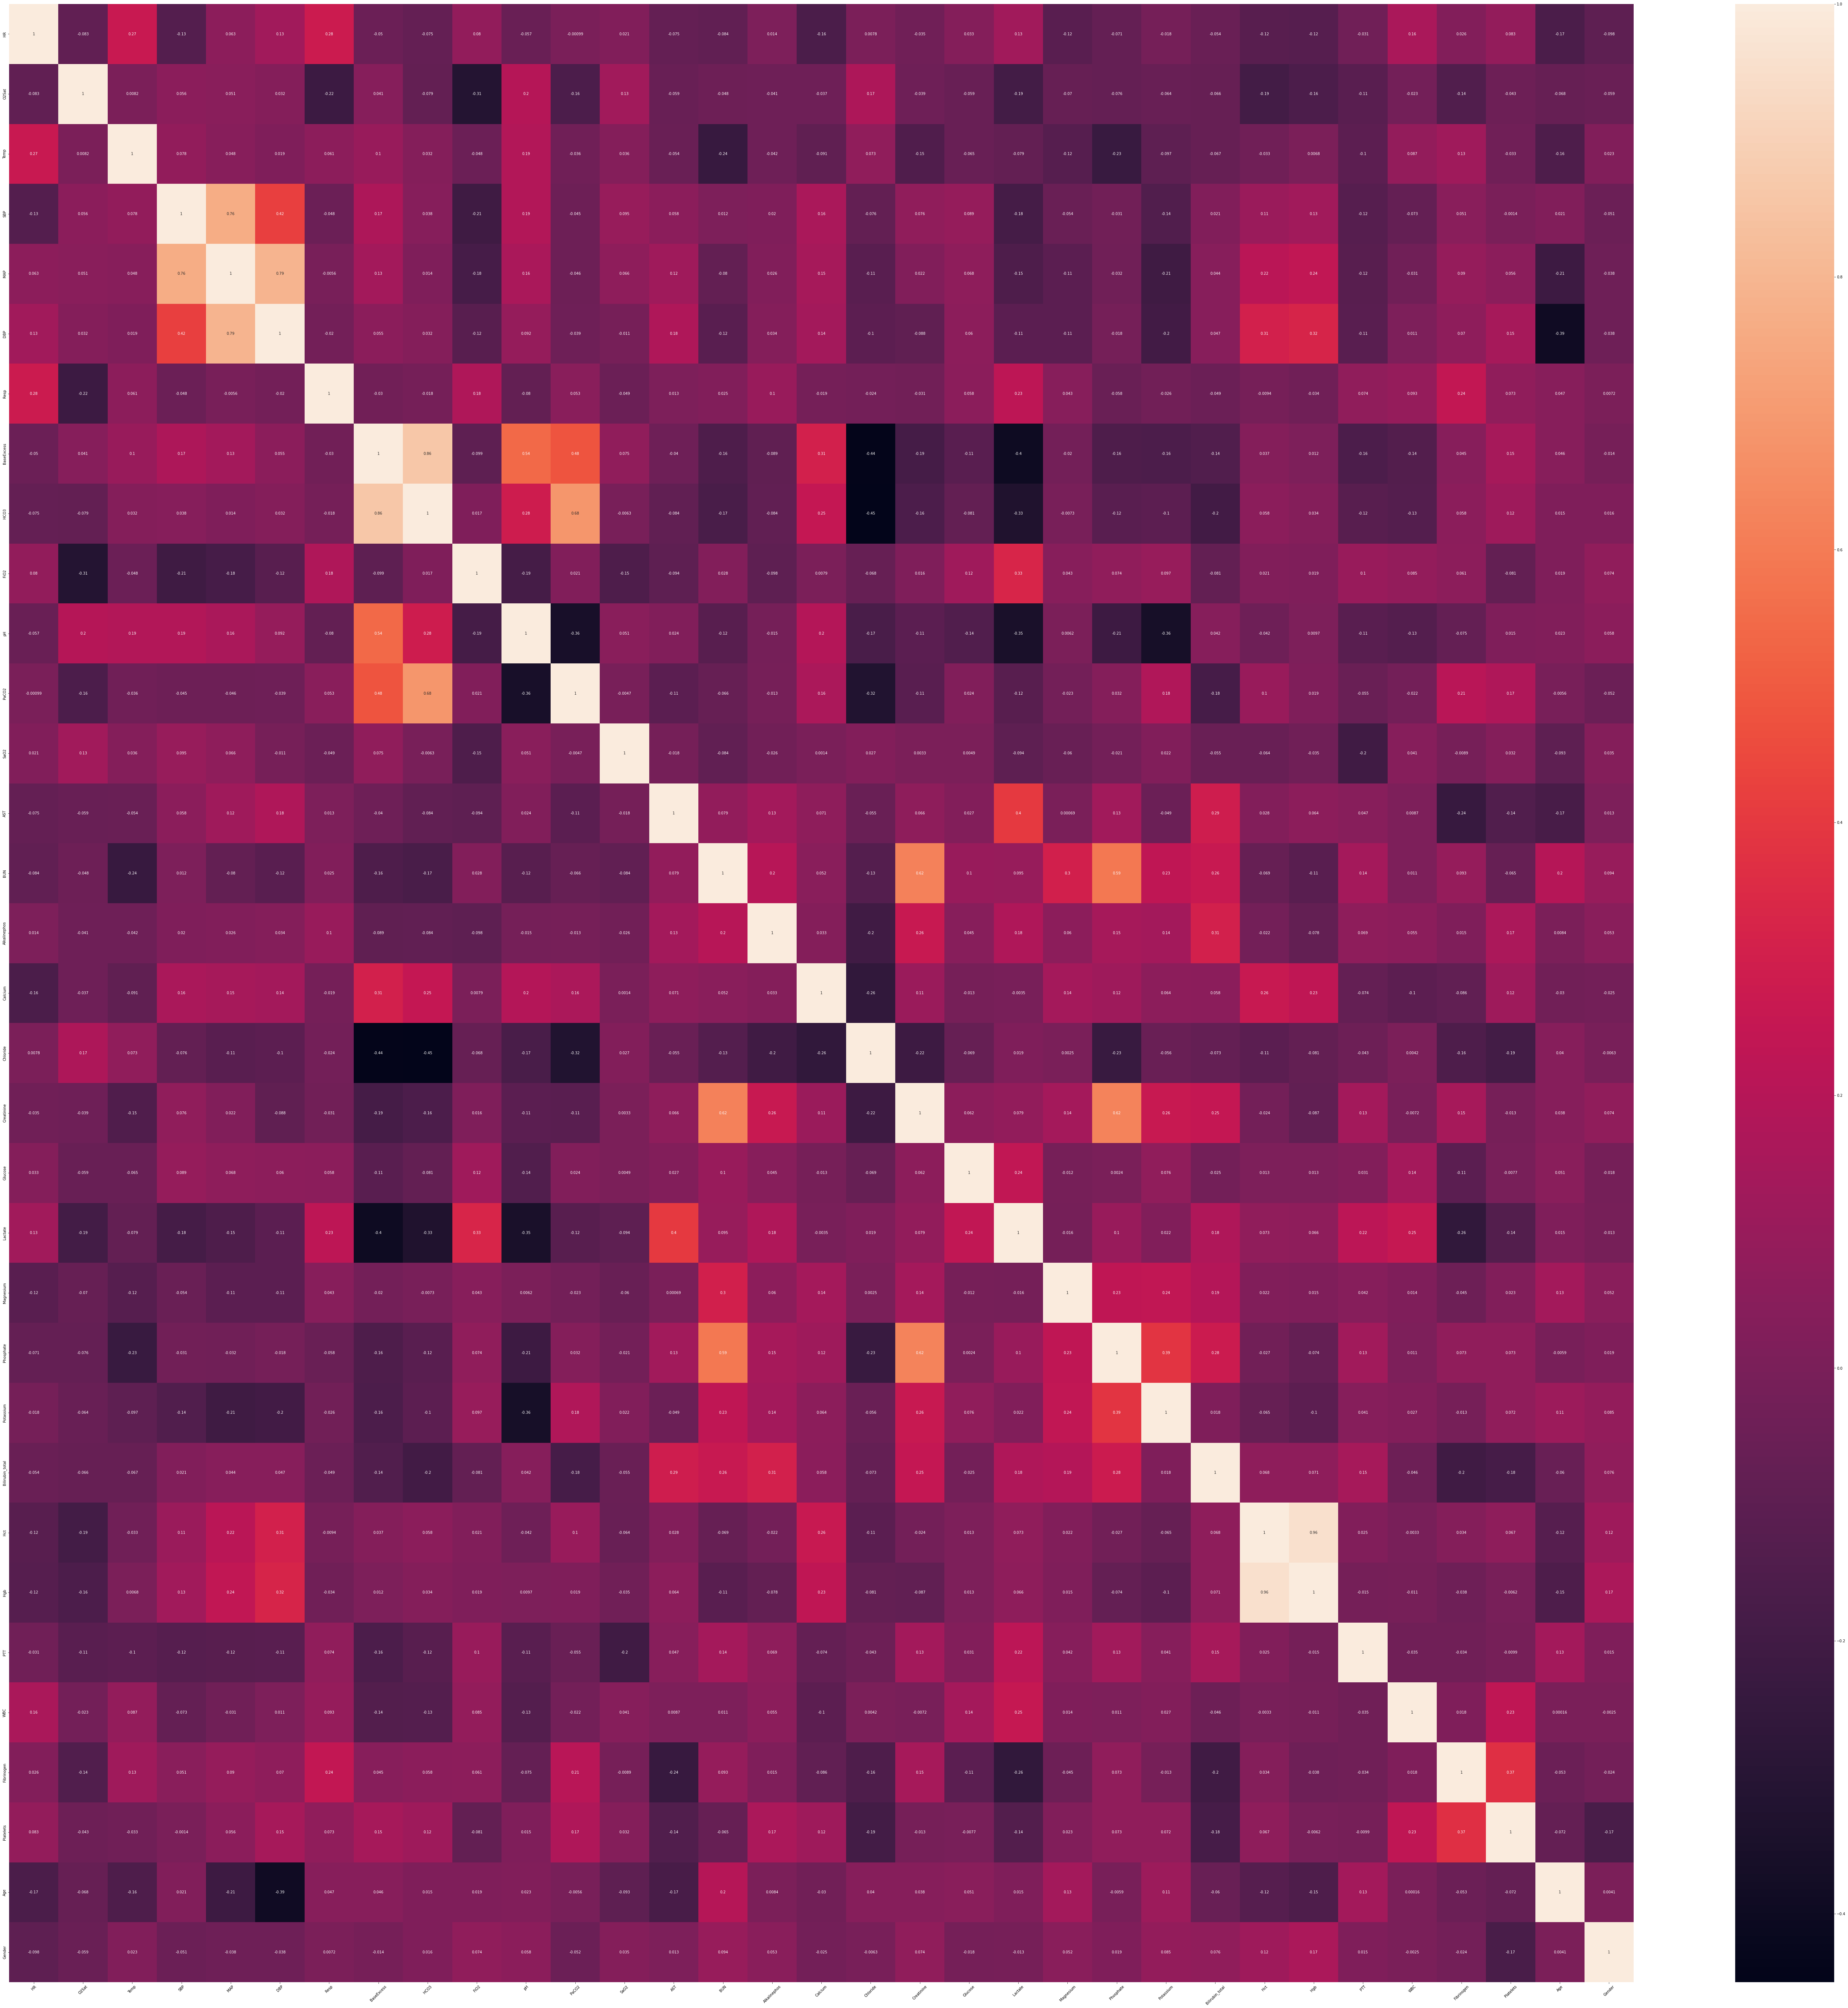

In [13]:
fig = plt.figure(figsize = (100,100))

sns.heatmap(df_condensed.corr(), annot = True);

plt.xticks(rotation = 45);

Method to visualise most correlated features

In [14]:
def top3_graph(col):
    top3_corr = df_condensed.corr()[[col]].sort_values(col, ascending=False).head(4)[col].index
    fig, axes = plt.subplots(1, 3, figsize = (20, 6))
    fig.suptitle(col)
    for i in range(3):
        sns.scatterplot(x = col, y = top3_corr[i+1], data = df_condensed, ax = axes[i]);
        
def top5_graph(col, df):
    top5_corr = df.corr()[[col]].sort_values(col, ascending=False).head(6)[col].index
    fig, axes = plt.subplots(1, 5, figsize = (20, 6))
    fig.suptitle(col)
    for i in range(5):
        sns.scatterplot(x = col, y = top5_corr[i+1], data = df, ax = axes[i]);

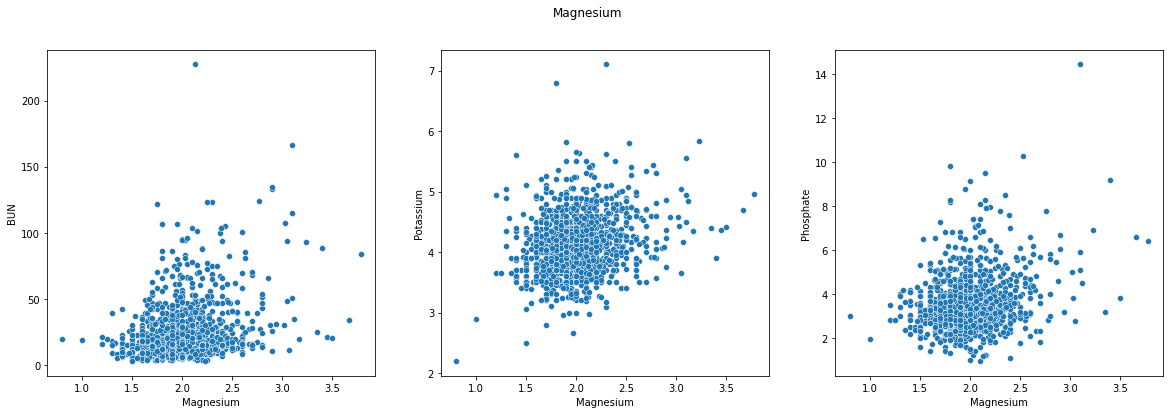

In [15]:
top3_graph("Magnesium")

Layered KNN and Linear Regression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer

def fill_nan_with_model(df, model):
    for col in df.columns:
        for i in range(df.shape[0]):
            if np.isnan(df[col].iloc[i]):
                df[col].iloc[i] = model[col].iloc[i]

def remove_all_nan(df):
    return df.dropna()

def regress_KNN(col, df, df_knn):
    df_temp = remove_all_nan(df)
    x = df_temp.drop(columns=col)
    y = df_temp[col]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
    model = LinearRegression()
    model.fit(x_train, y_train)
    return model.predict(df_knn.drop(columns=col))

def perform_knn(df):
    imputer = KNNImputer(n_neighbors=3)
    return pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

def gen_regress_knn(df):
    df_knn = perform_knn(df)
    df_return = pd.DataFrame()
    for col in df.columns:
        df_return[col] = regress_KNN(col, df, df_knn)
    return df_return

In [17]:
five_percent = list(percent_null.sort_values()[percent_null <= 5].index)

In [18]:
df_five_percent = df_condensed[five_percent]
df_five_percent.head()

HR       Age       MAP   Gender     O2Sat      Resp  \
patient                                                               
p000040  96.000000 57.170000 72.280455 1.000000 98.050000 21.021739   
p000042 103.073770 63.590000 80.392857 0.000000 96.918182 16.919355   
p000043 119.190476 46.350000 74.194524 0.000000 94.333333 24.773810   
p000054  90.836364 70.510000 65.963636 1.000000 95.129630 20.054545   
p000056  89.000000 68.200000 84.625000 1.000000 96.187500 15.937500   

               SBP      Temp    Glucose        BUN       Hct  Potassium  \
patient                                                                   
p000040  92.340909 36.665000 111.500000  17.000000 29.550000   5.200000   
p000042 117.562500 37.348182 118.875000   5.800000 29.835714   3.412500   
p000043  92.821429 35.742500  90.000000  81.000000 33.900000   3.500000   
p000054 104.154545 36.339231  93.500000  49.000000 34.233333   4.266667   
p000056 134.375000 36.682500 141.000000 107.000000 21.100000   4.300000   

         Creatinine      HCO3   Chloride       Hgb       WBC  Platelets  
patient                                                                  
p000040    2.400000 23.500000 103.500000  9.350000  8.400000 332.000000  
p000042    0.500000 24.200000 108.800000  9.914286 10.100000 368.833333  
p000043    2.050000 33.500000  88.000000  9.966667  7.750000 345.000000  
p000054    1.500000 24.000000 103.666667 11.200000 18.200000 544.666667  
p000056   10.600000 21.000000  95.000000  7.400000 15.400000 167.000000

In [19]:
df_five_knn = df_five_percent.copy()
fill_nan_with_model(df_five_knn, gen_regress_knn(df_five_knn))
df_five_knn

HR       Age       MAP   Gender     O2Sat      Resp  \
patient                                                               
p000040  96.000000 57.170000 72.280455 1.000000 98.050000 21.021739   
p000042 103.073770 63.590000 80.392857 0.000000 96.918182 16.919355   
p000043 119.190476 46.350000 74.194524 0.000000 94.333333 24.773810   
p000054  90.836364 70.510000 65.963636 1.000000 95.129630 20.054545   
p000056  89.000000 68.200000 84.625000 1.000000 96.187500 15.937500   
...            ...       ...       ...      ...       ...       ...   
p020609 107.729167 38.170000 87.666667 0.000000 99.500000 12.354167   
p020620  95.190000 69.980000 81.680000 1.000000 97.781250 19.530612   
p020621  61.789474 81.600000 96.508947 1.000000 94.916667 18.400000   
p020634  86.600000 57.260000 67.641500 1.000000 96.525000 16.537500   
p020635  68.675000 56.750000 82.050000 1.000000 96.175000 15.500000   

               SBP      Temp    Glucose        BUN       Hct  Potassium  \
patient                                                                   
p000040  92.340909 36.665000 111.500000  17.000000 29.550000   5.200000   
p000042 117.562500 37.348182 118.875000   5.800000 29.835714   3.412500   
p000043  92.821429 35.742500  90.000000  81.000000 33.900000   3.500000   
p000054 104.154545 36.339231  93.500000  49.000000 34.233333   4.266667   
p000056 134.375000 36.682500 141.000000 107.000000 21.100000   4.300000   
...            ...       ...        ...        ...       ...        ...   
p020609 115.354167 37.028333 127.000000   8.000000 27.200000   3.600000   
p020620 125.000000 36.680833 132.000000  35.000000 38.100000   4.475000   
p020621 150.526316 36.777500  85.000000  11.000000 45.400000   4.200000   
p020634 105.150000 37.310000 120.000000  15.000000 28.150000   4.183333   
p020635 127.706897 36.883000 107.000000  12.000000 28.700000   3.700000   

         Creatinine      HCO3   Chloride       Hgb       WBC  Platelets  
patient                                                                  
p000040    2.400000 23.500000 103.500000  9.350000  8.400000 332.000000  
p000042    0.500000 24.200000 108.800000  9.914286 10.100000 368.833333  
p000043    2.050000 33.500000  88.000000  9.966667  7.750000 345.000000  
p000054    1.500000 24.000000 103.666667 11.200000 18.200000 544.666667  
p000056   10.600000 21.000000  95.000000  7.400000 15.400000 167.000000  
...             ...       ...        ...       ...       ...        ...  
p020609    0.400000 30.000000 102.000000  9.050000 13.700000 170.000000  
p020620    4.050000 23.000000 107.250000 11.300000 11.500000 139.000000  
p020621    1.100000 25.000000 102.000000 16.200000  7.000000 206.000000  
p020634    0.650000 27.000000 111.000000  9.950000  8.300000 224.500000  
p020635    0.800000 24.000000 110.000000 10.100000  9.000000 301.000000  

[1411 rows x 18 columns]

In [20]:
percent_null.sort_values()

HR                 0.000000
Age                0.000000
MAP                0.000000
Gender             0.000000
O2Sat              0.000000
Resp               0.070872
SBP                0.708717
Temp               1.204819
Glucose            1.984408
BUN                1.984408
Hct                2.126152
Potassium          2.267895
Creatinine         2.338767
HCO3               2.480510
Chloride           2.551382
Hgb                2.976612
WBC                3.472714
Platelets          3.614458
Magnesium          6.165840
Phosphate         17.505315
Calcium           17.930546
PTT               20.978030
pH                35.790220
DBP               36.144578
BaseExcess        38.483345
PaCO2             39.050319
FiO2              41.318214
SaO2              60.949681
Lactate           63.288448
AST               70.942594
Alkalinephos      71.651311
Bilirubin_total   71.793055
Fibrinogen        85.825656
dtype: float64

In [21]:
def top5_corr(col, df):
    return list(df.corr()[[col]].abs().sort_values(col, ascending=False)[1:6].index)

top5_corr("Magnesium", df_condensed)

['BUN', 'Potassium', 'Phosphate', 'Bilirubin_total', 'Creatinine']

In [22]:
def check_0_nulls(series):
    if series.sum() == 0:
        return True
    return False

def remove_threshold(percent):
    return list(percent_null[percent_null <= percent].index.values)

def next_null(series):
    index_diff = list(percent_null.index.difference(amt_null(series).index))
    if len(index_diff) == 0:
        return ''
    return percent_null[index_diff].sort_values().index.values[0]

df_base = df_five_knn.copy()

while True:
    next_in = next_null(df_base)
    if next_in == '':
        break
    df_base[next_in] = df_condensed[next_in]
    fill_nan_with_model(df_base, gen_regress_knn(df_base))

df_prune = df_base[remove_threshold(30)]
df_prune
#BUN, Creatinine, Platelets, WBC, and Glucose

HR     O2Sat      Temp        SBP       MAP      Resp  \
patient                                                                 
p000040  96.000000 98.050000 36.665000  92.340909 72.280455 21.021739   
p000042 103.073770 96.918182 37.348182 117.562500 80.392857 16.919355   
p000043 119.190476 94.333333 35.742500  92.821429 74.194524 24.773810   
p000054  90.836364 95.129630 36.339231 104.154545 65.963636 20.054545   
p000056  89.000000 96.187500 36.682500 134.375000 84.625000 15.937500   
...            ...       ...       ...        ...       ...       ...   
p020609 107.729167 99.500000 37.028333 115.354167 87.666667 12.354167   
p020620  95.190000 97.781250 36.680833 125.000000 81.680000 19.530612   
p020621  61.789474 94.916667 36.777500 150.526316 96.508947 18.400000   
p020634  86.600000 96.525000 37.310000 105.150000 67.641500 16.537500   
p020635  68.675000 96.175000 36.883000 127.706897 82.050000 15.500000   

             HCO3        BUN  Calcium   Chloride  ...  Magnesium  Phosphate  \
patient                                           ...                         
p000040 23.500000  17.000000 7.400000 103.500000  ...   1.650000   2.250000   
p000042 24.200000   5.800000 7.850000 108.800000  ...   1.750000   3.250000   
p000043 33.500000  81.000000 9.800000  88.000000  ...   2.633333   5.800000   
p000054 24.000000  49.000000 9.000000 103.666667  ...   2.450000   2.950000   
p000056 21.000000 107.000000 7.500000  95.000000  ...   1.800000   8.200000   
...           ...        ...      ...        ...  ...        ...        ...   
p020609 30.000000   8.000000 8.228605 102.000000  ...   1.900000   2.800000   
p020620 23.000000  35.000000 8.425000 107.250000  ...   2.366667   3.400000   
p020621 25.000000  11.000000 9.046337 102.000000  ...   2.125861   3.264656   
p020634 27.000000  15.000000 8.063423 111.000000  ...   2.200000   3.036759   
p020635 24.000000  12.000000 7.800000 110.000000  ...   1.800000   2.200000   

         Potassium       Hct       Hgb       PTT       WBC  Platelets  \
patient                                                                 
p000040   5.200000 29.550000  9.350000 44.257405  8.400000 332.000000   
p000042   3.412500 29.835714  9.914286 28.540000 10.100000 368.833333   
p000043   3.500000 33.900000  9.966667 29.133333  7.750000 345.000000   
p000054   4.266667 34.233333 11.200000 34.300000 18.200000 544.666667   
p000056   4.300000 21.100000  7.400000 22.500000 15.400000 167.000000   
...            ...       ...       ...       ...       ...        ...   
p020609   3.600000 27.200000  9.050000 24.016631 13.700000 170.000000   
p020620   4.475000 38.100000 11.300000 94.816667 11.500000 139.000000   
p020621   4.200000 45.400000 16.200000 38.416630  7.000000 206.000000   
p020634   4.183333 28.150000  9.950000 30.000000  8.300000 224.500000   
p020635   3.700000 28.700000 10.100000 39.950000  9.000000 301.000000   

              Age   Gender  
patient                     
p000040 57.170000 1.000000  
p000042 63.590000 0.000000  
p000043 46.350000 0.000000  
p000054 70.510000 1.000000  
p000056 68.200000 1.000000  
...           ...      ...  
p020609 38.170000 0.000000  
p020620 69.980000 1.000000  
p020621 81.600000 1.000000  
p020634 57.260000 1.000000  
p020635 56.750000 1.000000  

[1411 rows x 22 columns]

In [23]:
df_prune.describe()[["BUN", "Creatinine", "Platelets", "WBC", "Glucose"]]

BUN  Creatinine   Platelets         WBC     Glucose
count 1411.000000 1411.000000 1411.000000 1411.000000 1411.000000
mean    22.953746    1.302143  214.127847   11.566132  131.606773
std     19.707477    1.394176  106.681143    6.762924   37.543504
min      3.000000    0.150000   14.000000    0.100000   38.000000
25%     12.000000    0.700000  144.750000    8.200000  109.675000
50%     17.000000    0.883333  194.000000   10.650000  124.083333
75%     26.000000    1.236667  261.392857   13.500000  145.000000
max    227.333333   13.800000 1067.500000  134.225000  501.000000

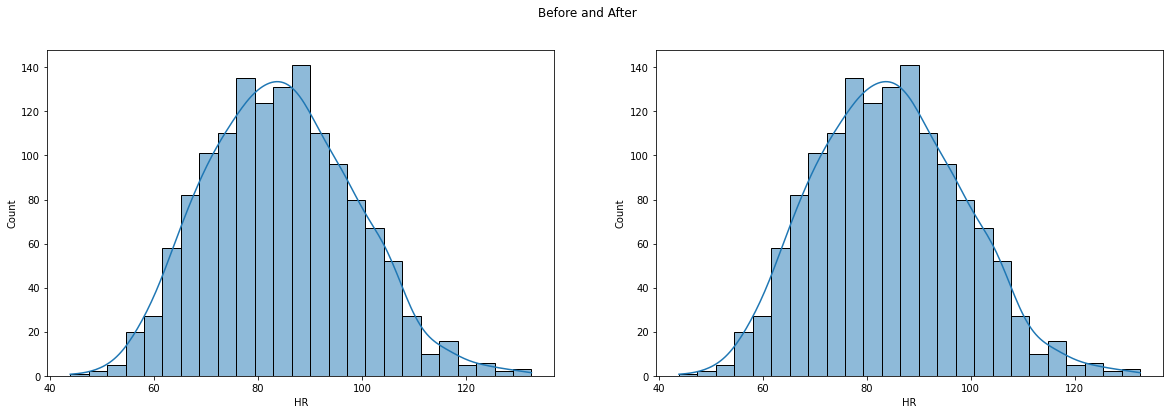

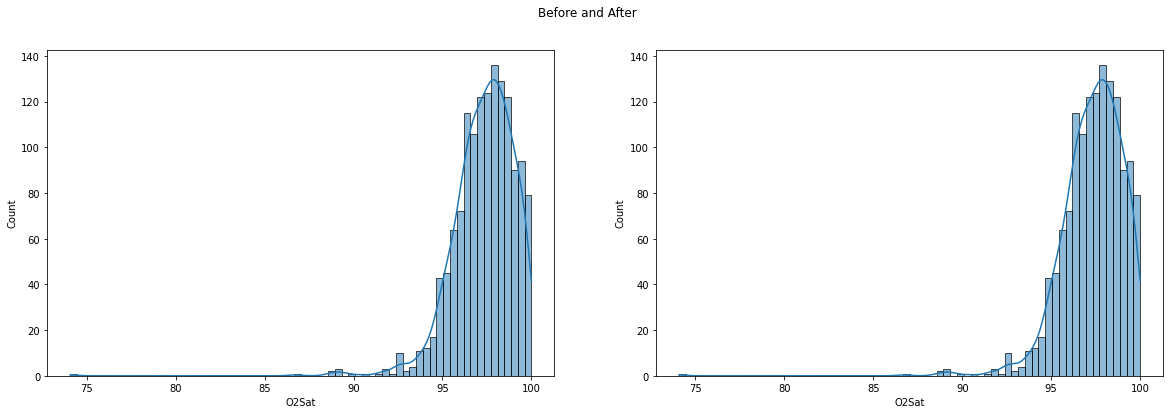

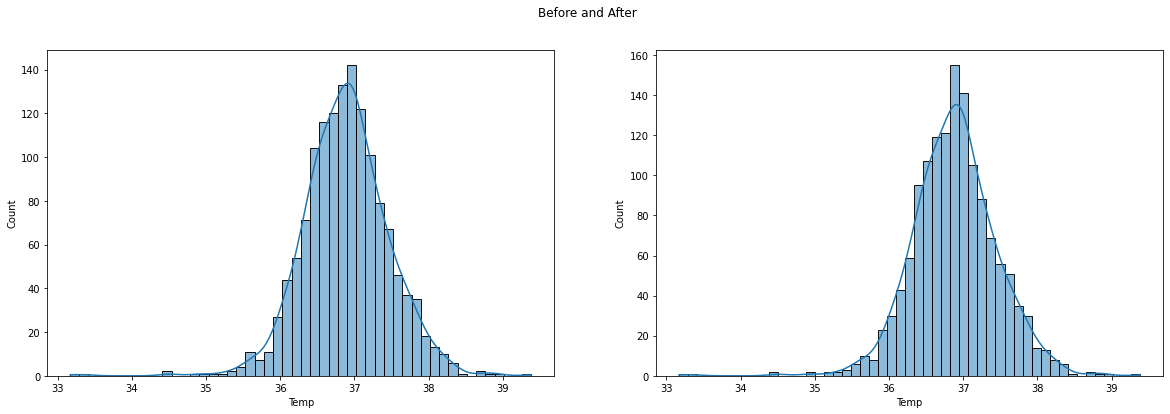

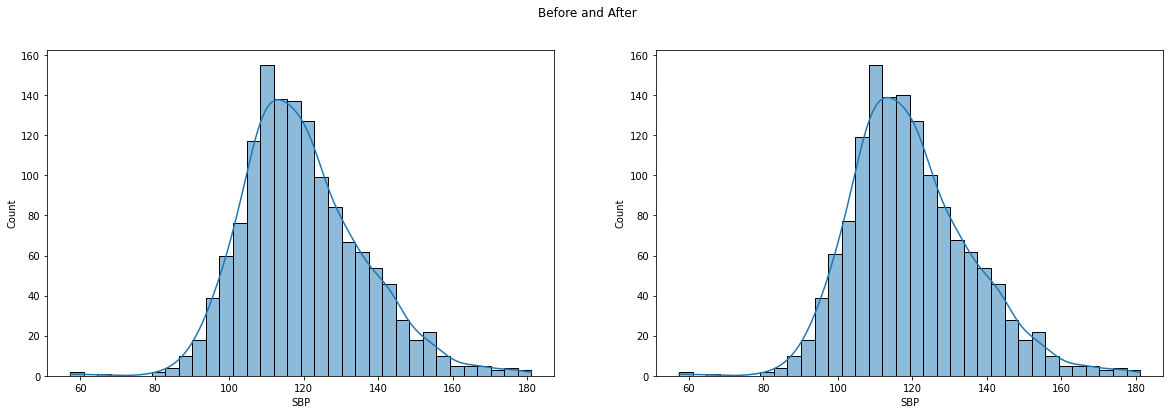

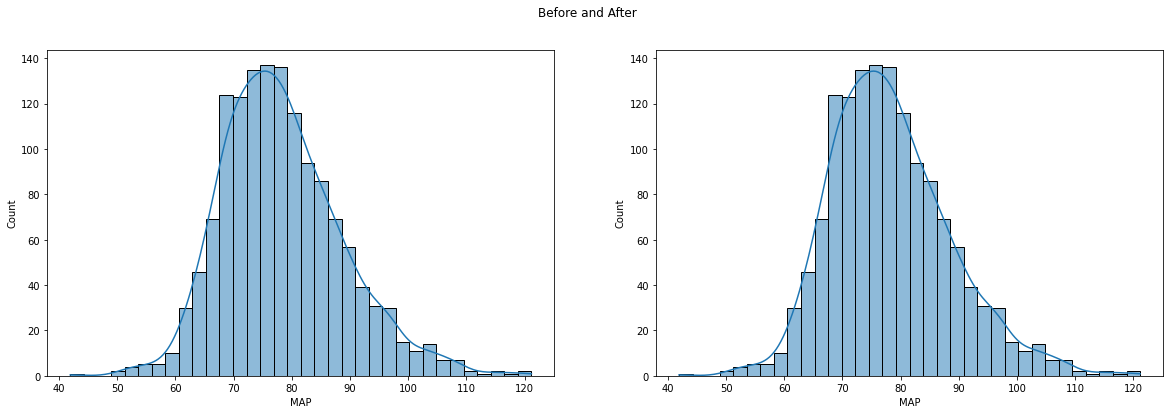

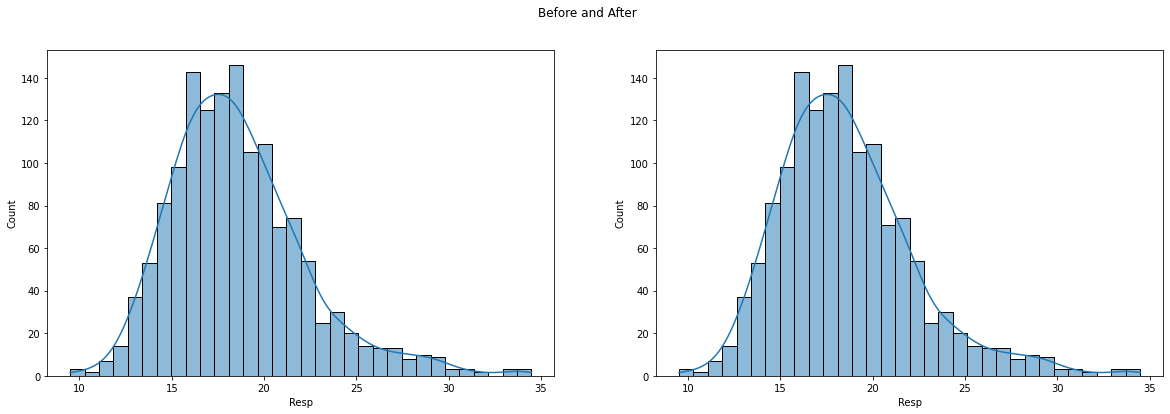

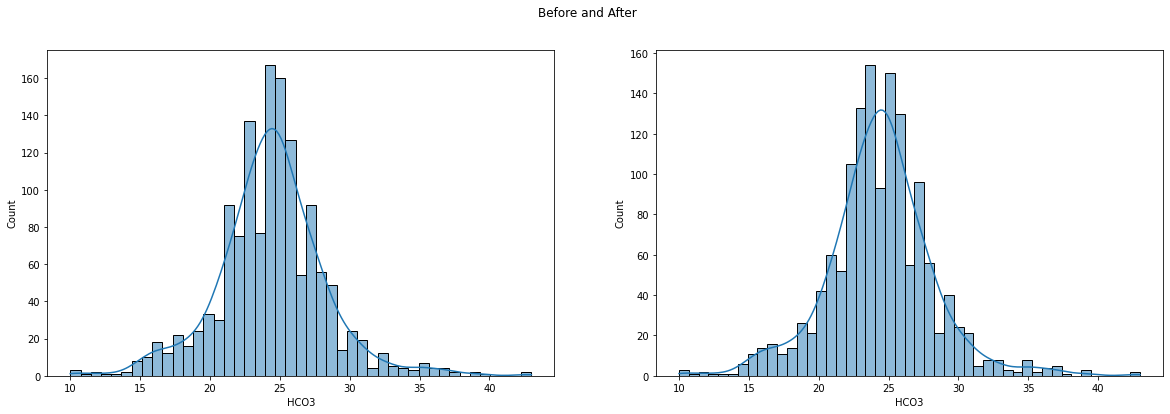

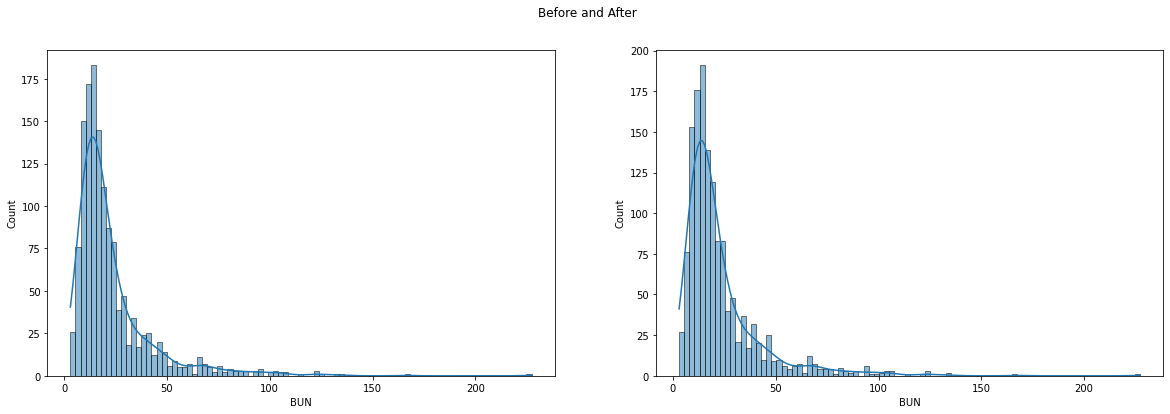

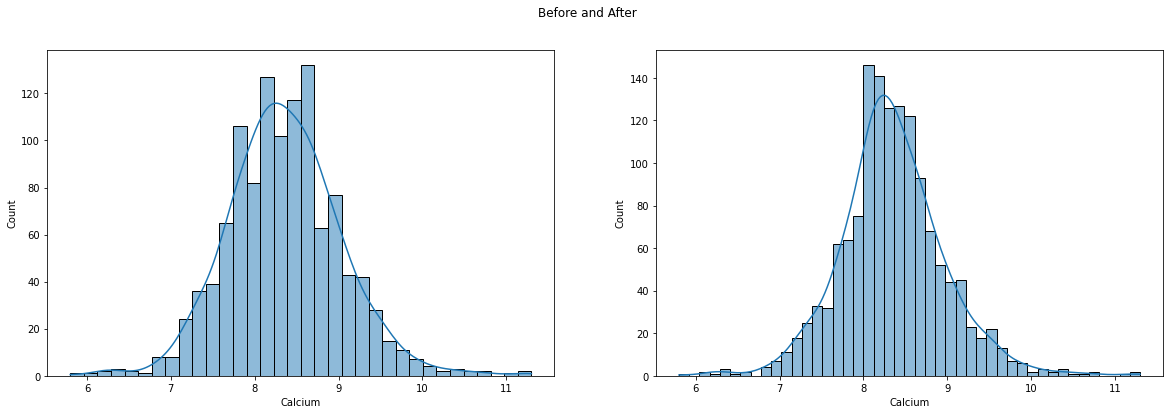

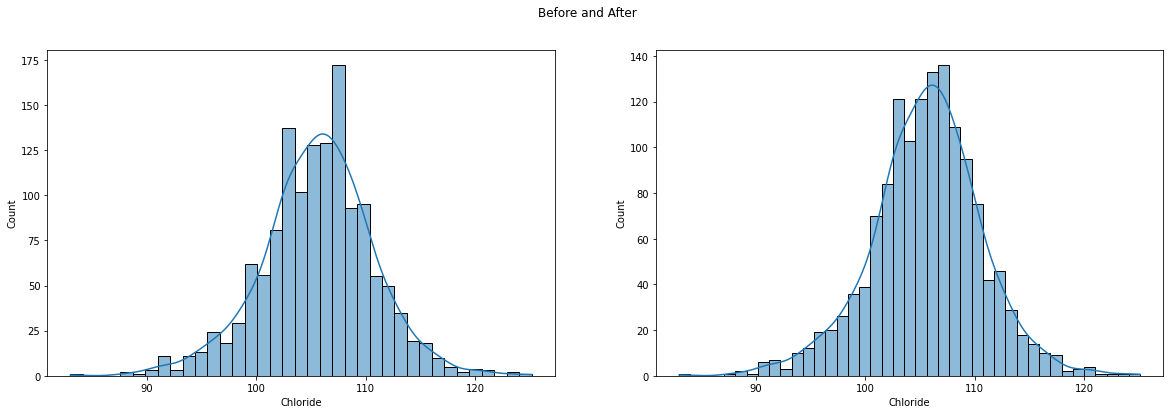

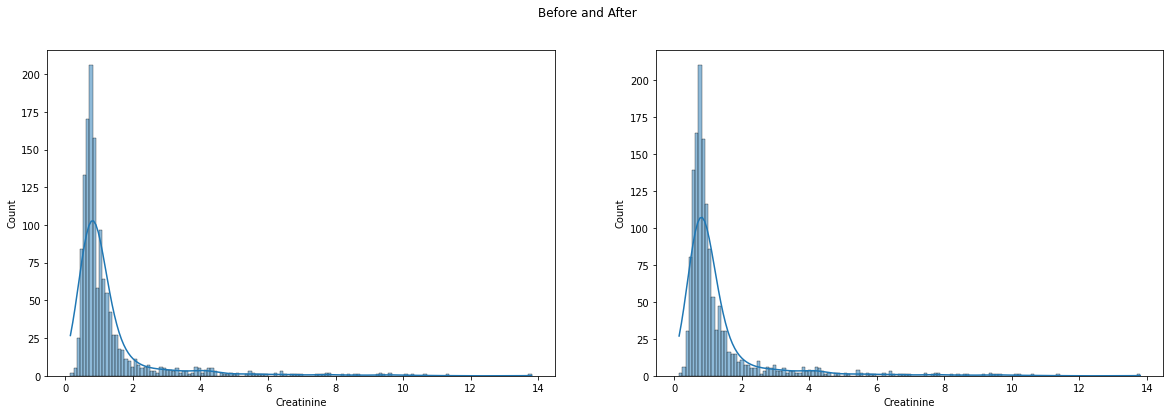

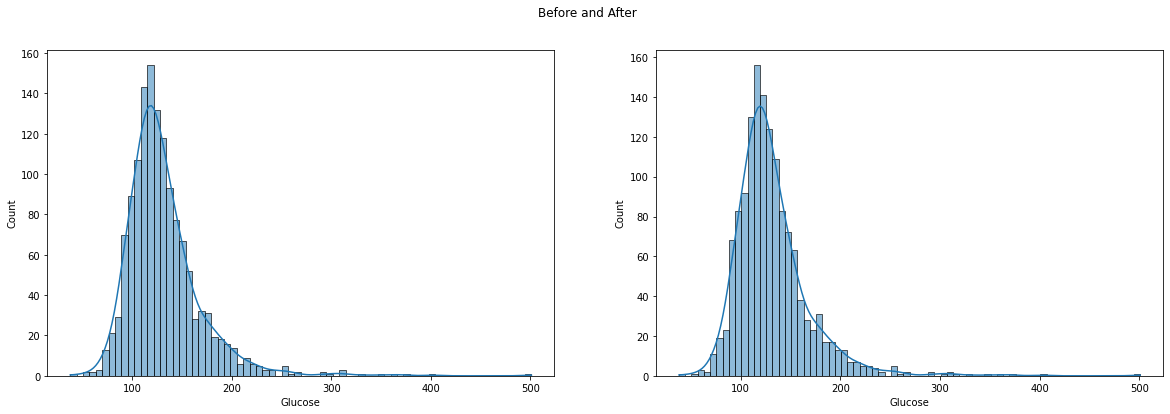

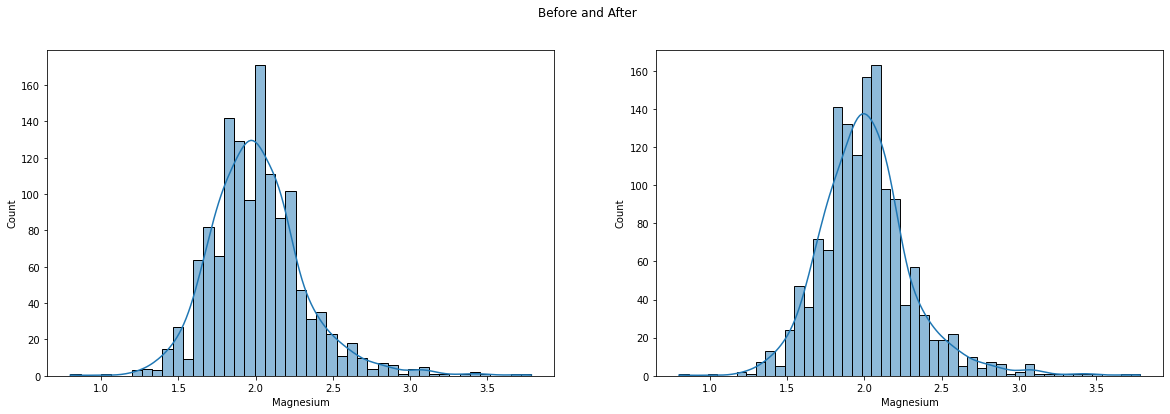

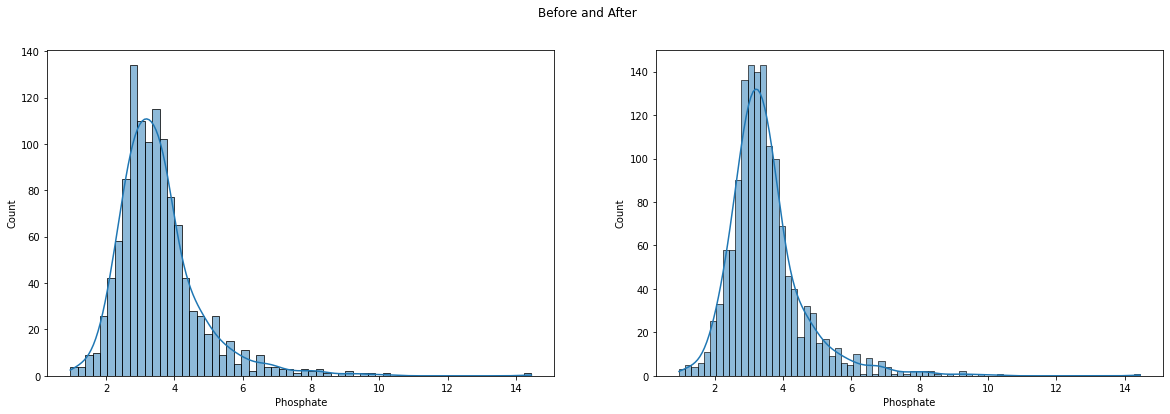

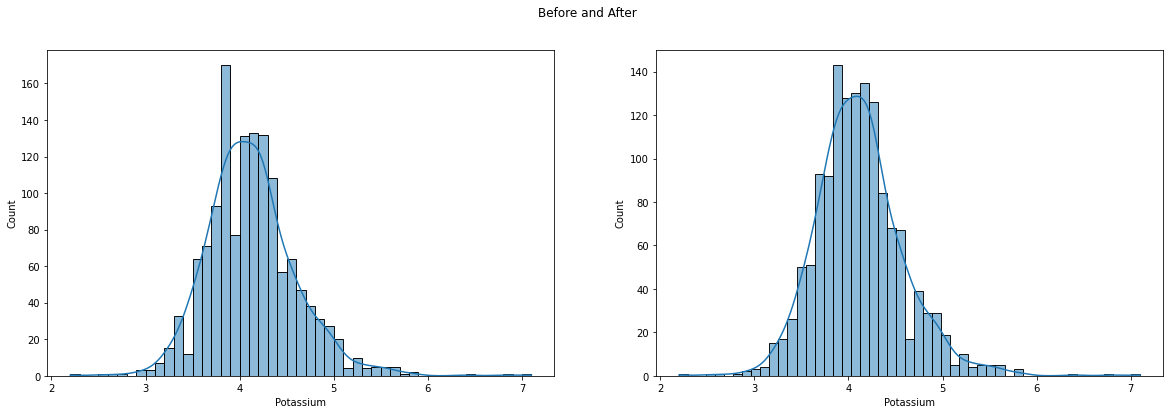

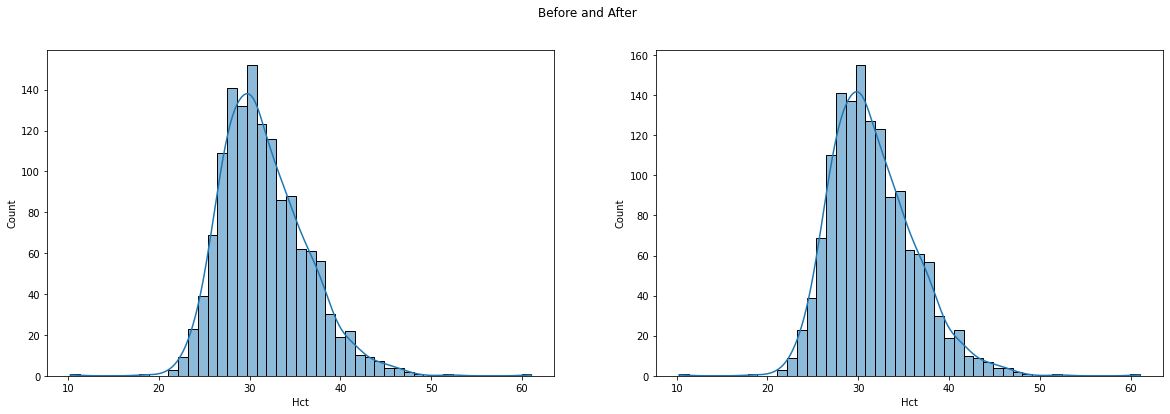

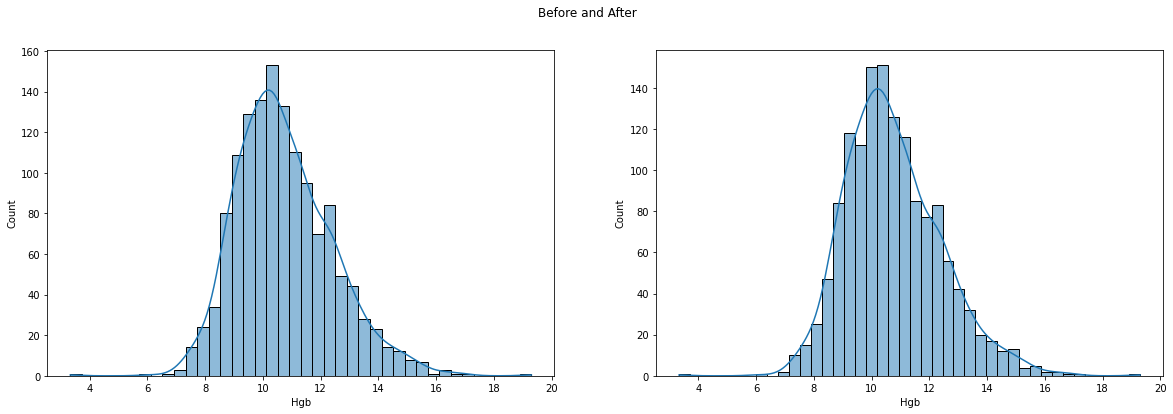

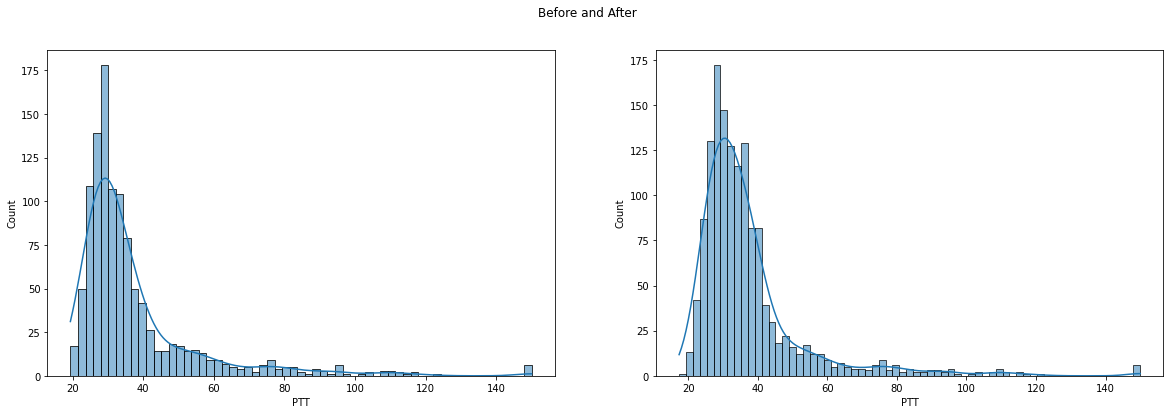

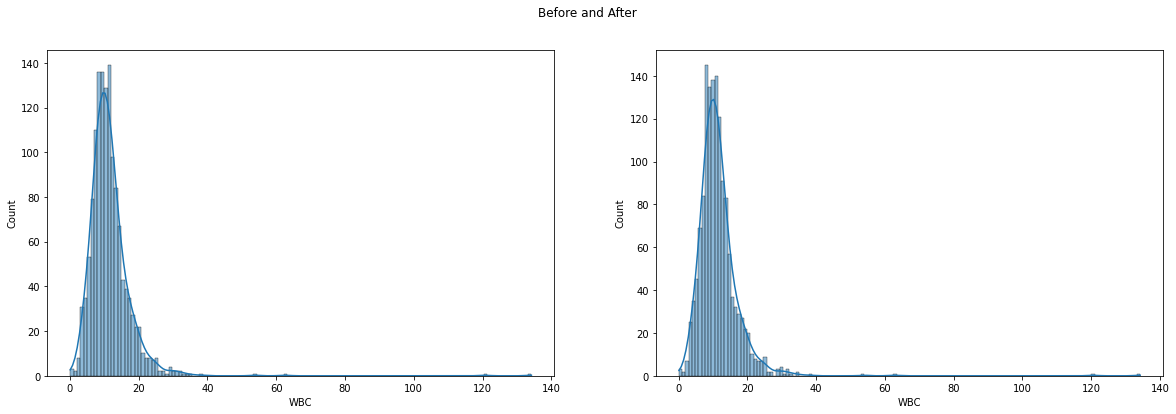

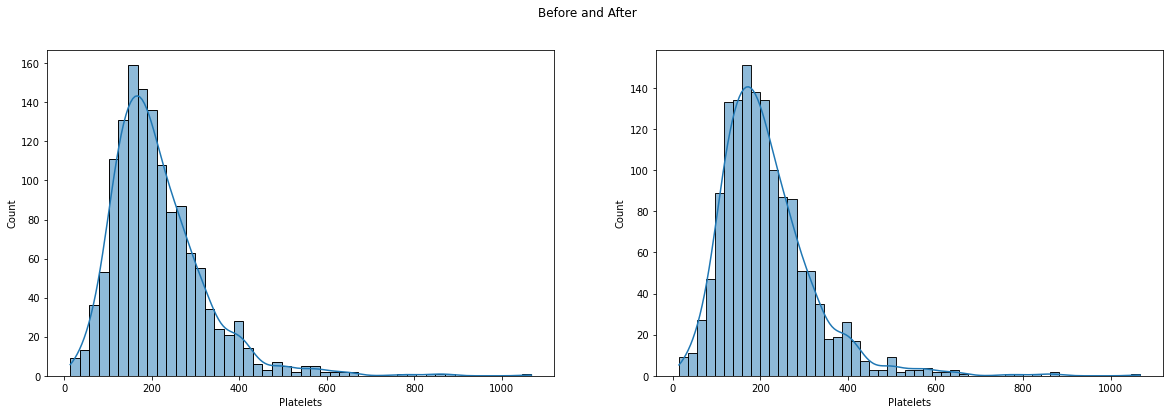

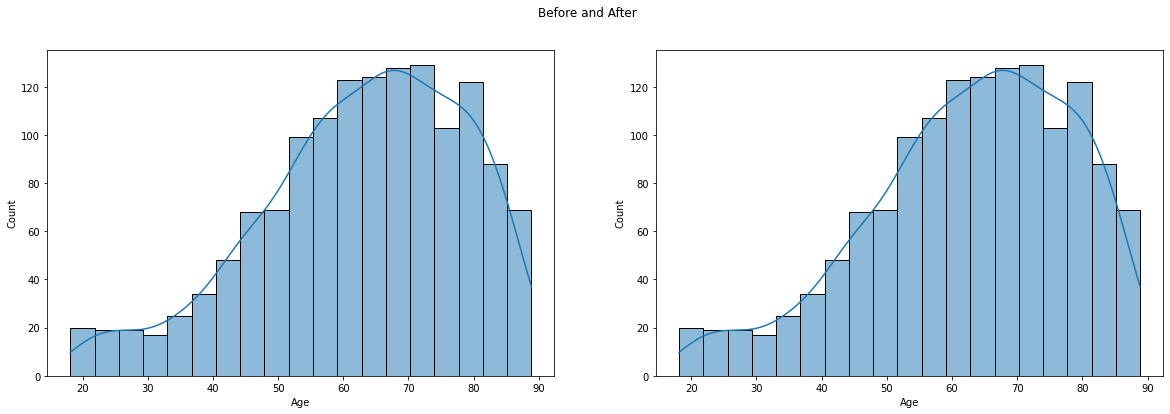

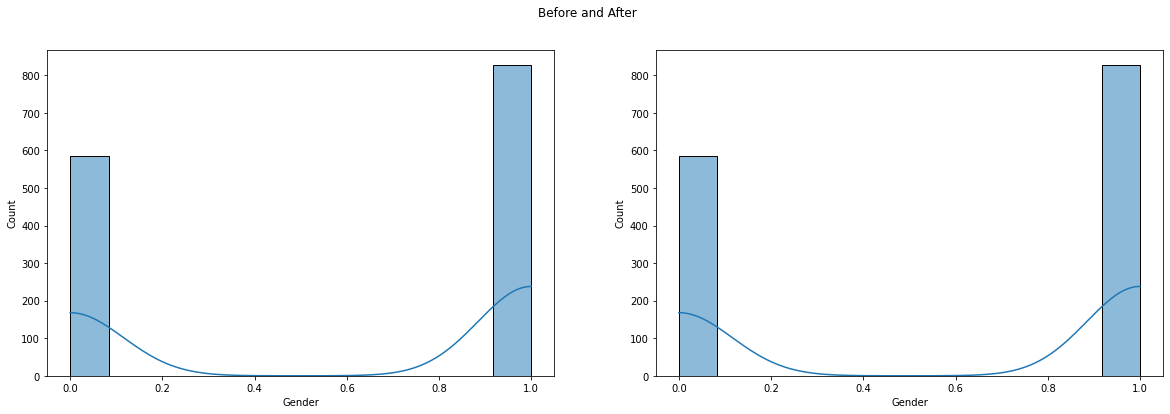

In [24]:
for col in df_prune.columns:
    before_after(col, df_base)

['AST', 'Alkalinephos', 'BaseExcess', 'Bilirubin_total', 'DBP', 'FiO2', 'Fibrinogen', 'Lactate', 'PaCO2', 'SaO2', 'pH']


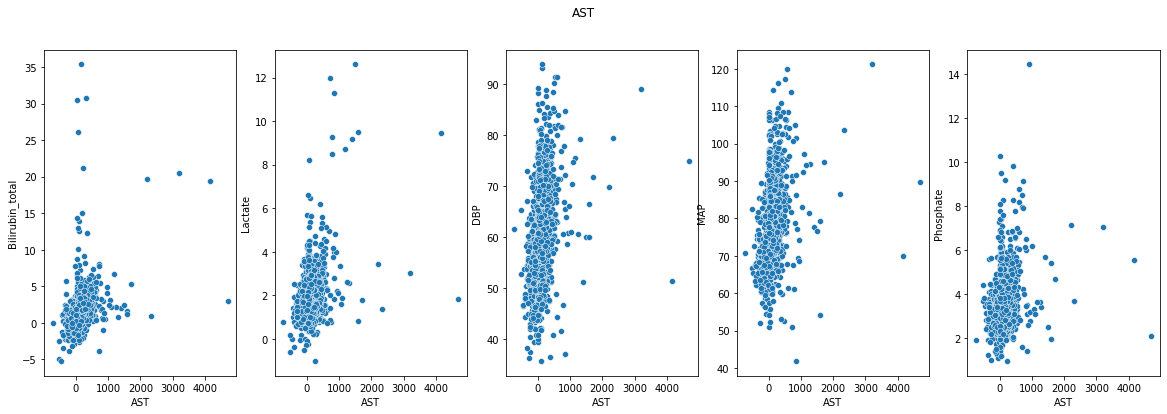

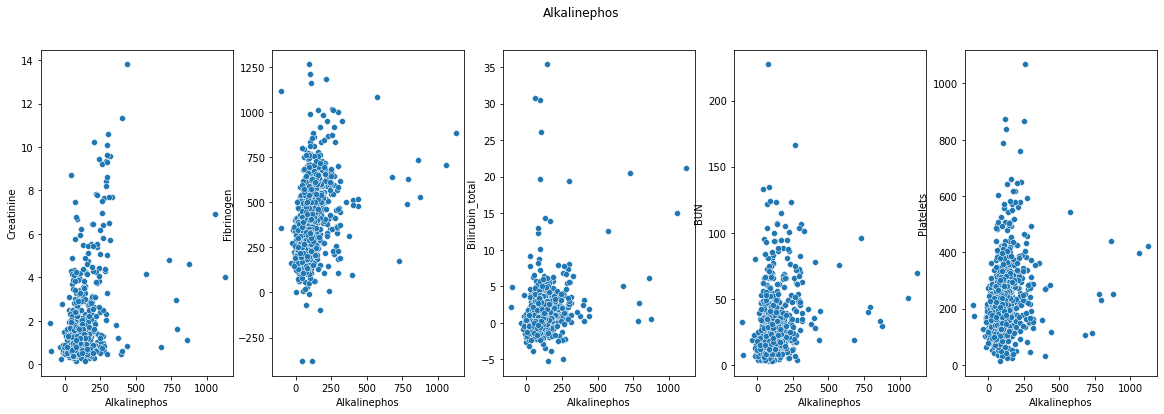

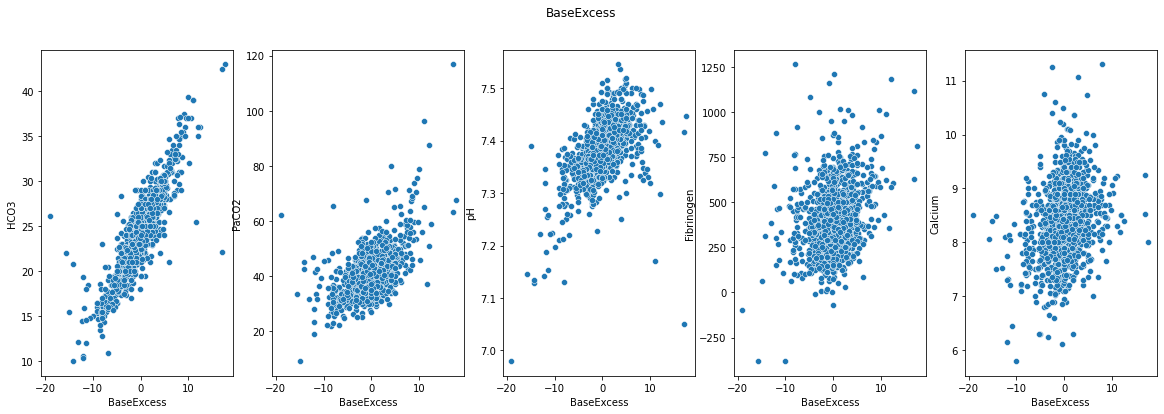

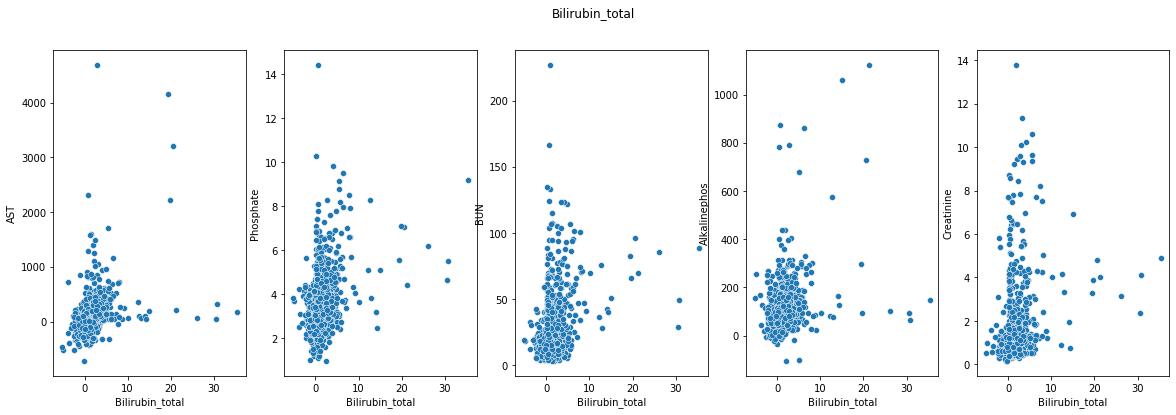

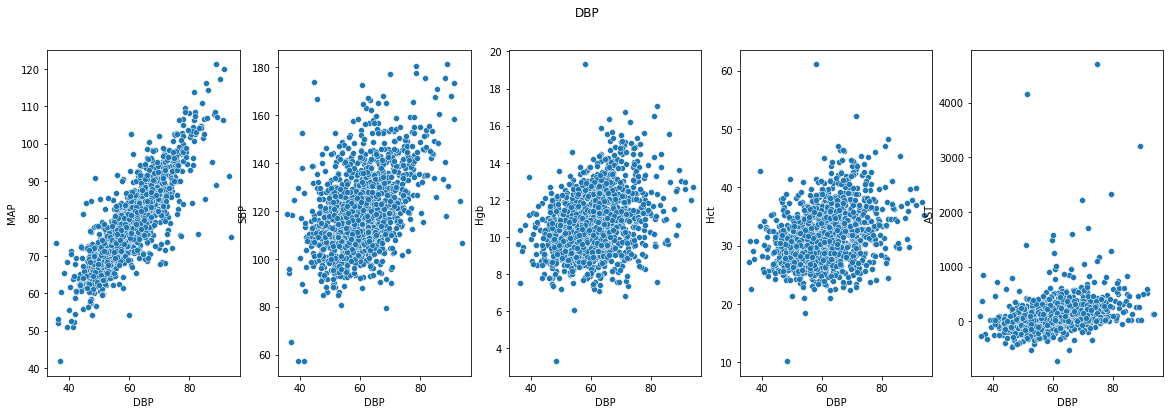

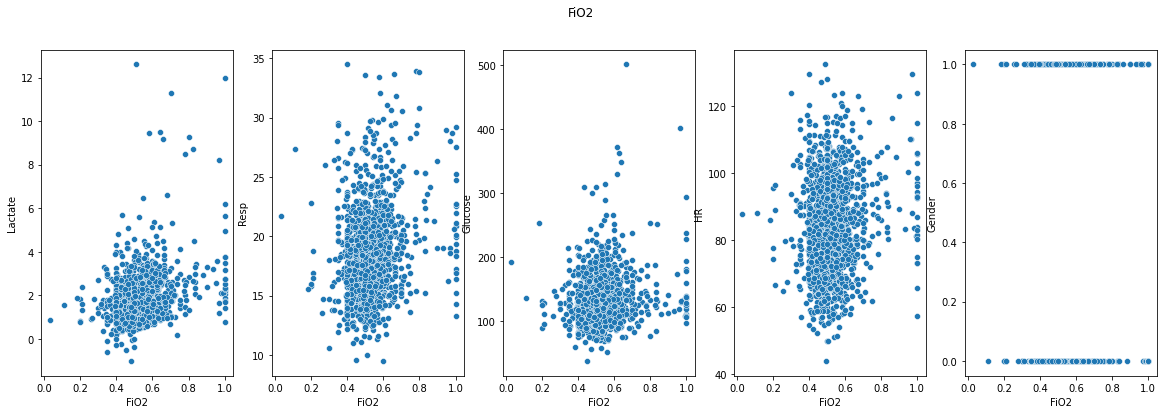

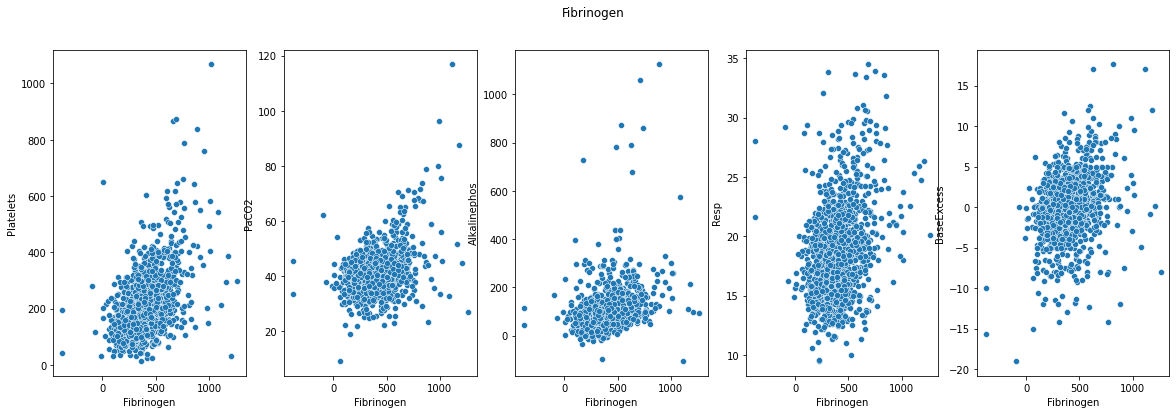

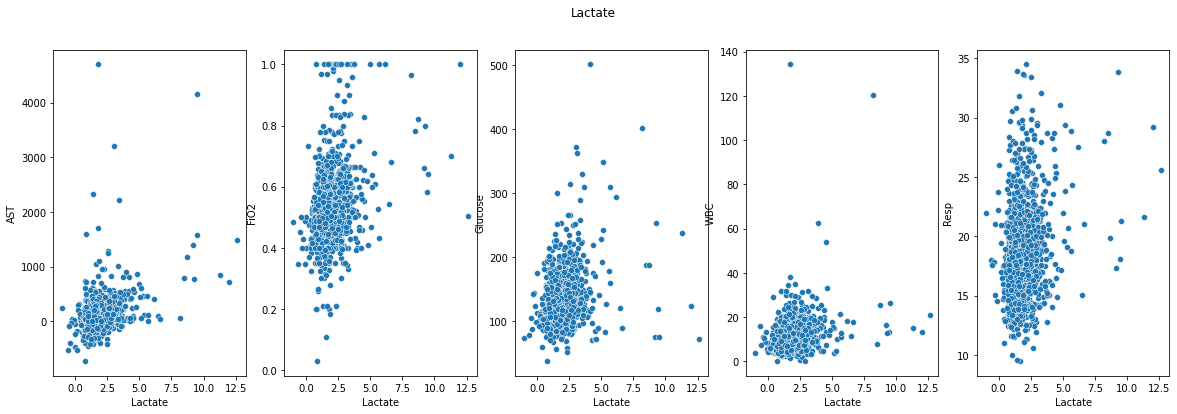

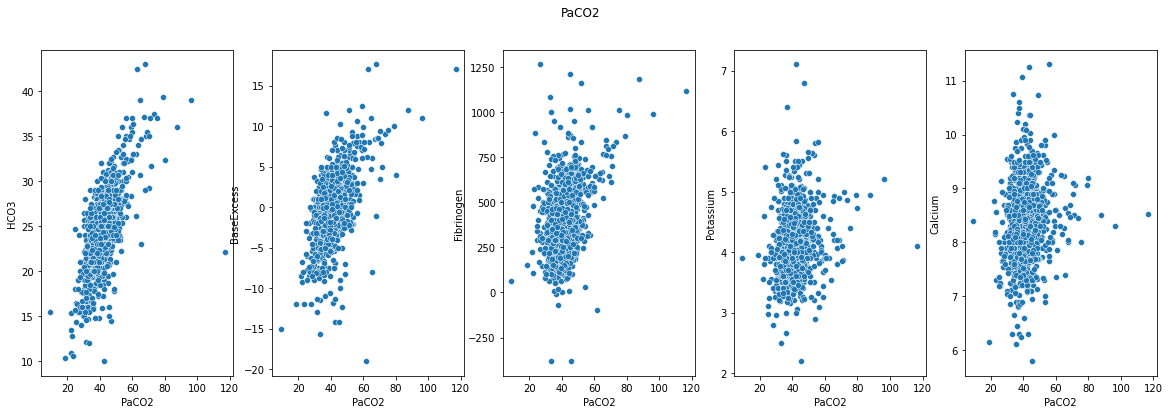

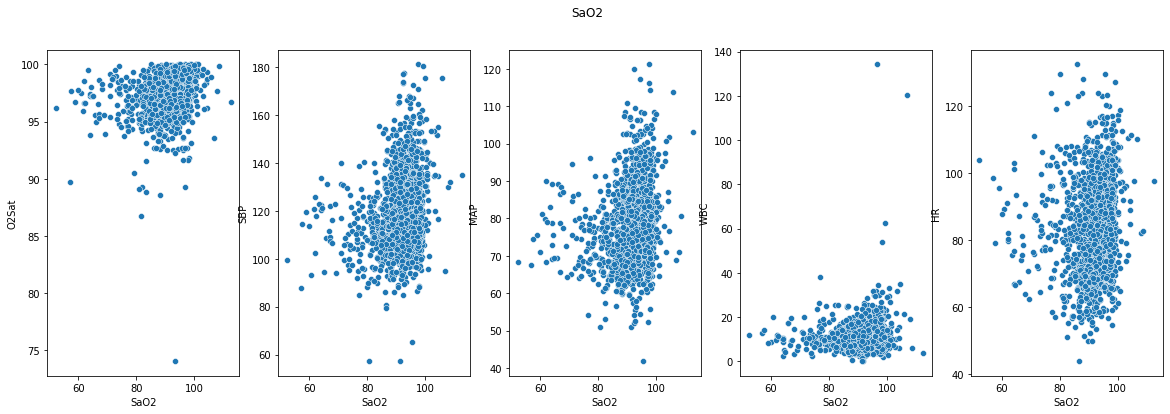

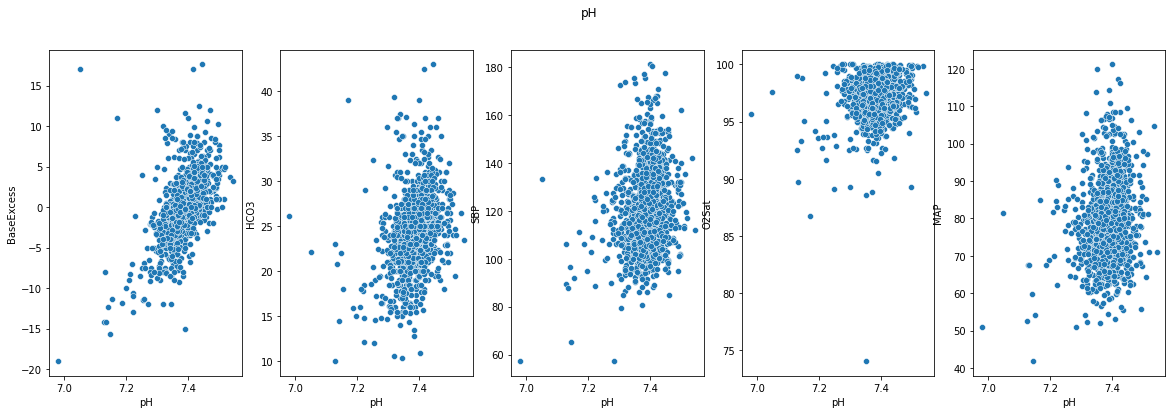

In [25]:
more_than_thresh = list(percent_null.index.difference(pd.Index(remove_threshold(30))))
print(more_than_thresh)
for col in more_than_thresh:
    top5_graph(col, df_base)

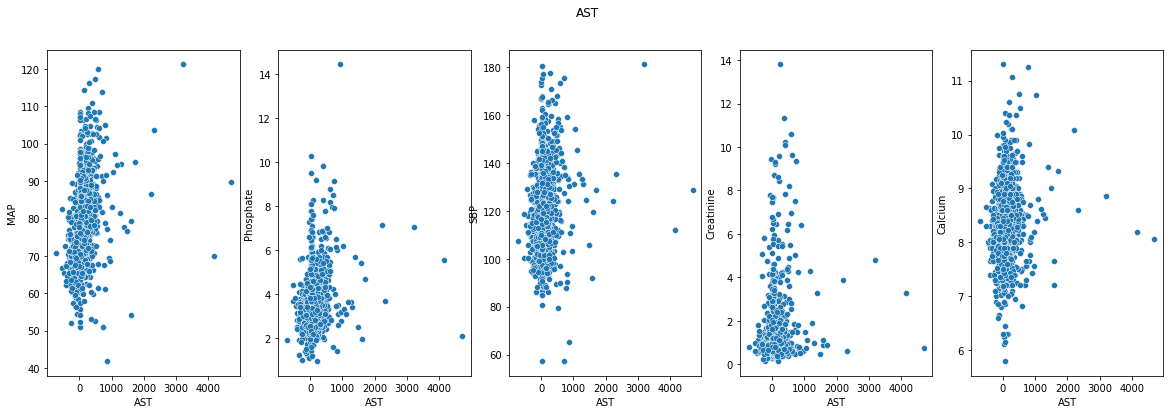

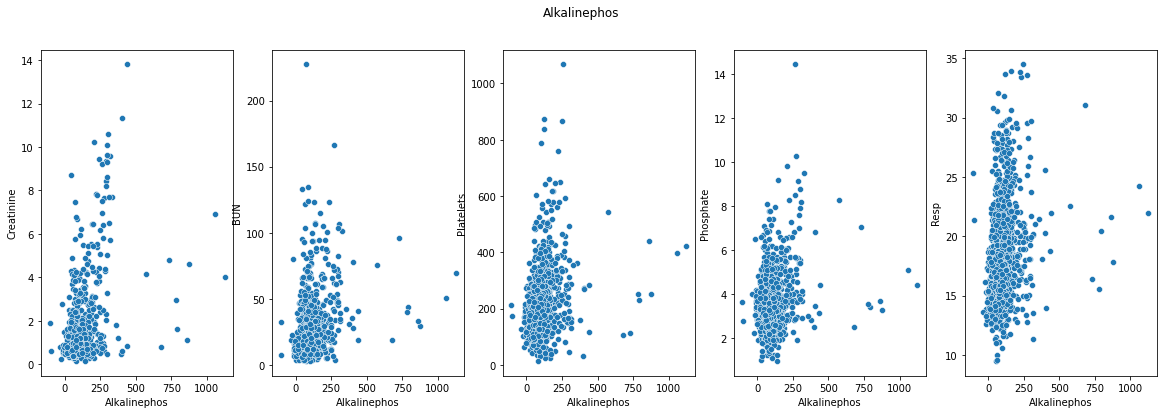

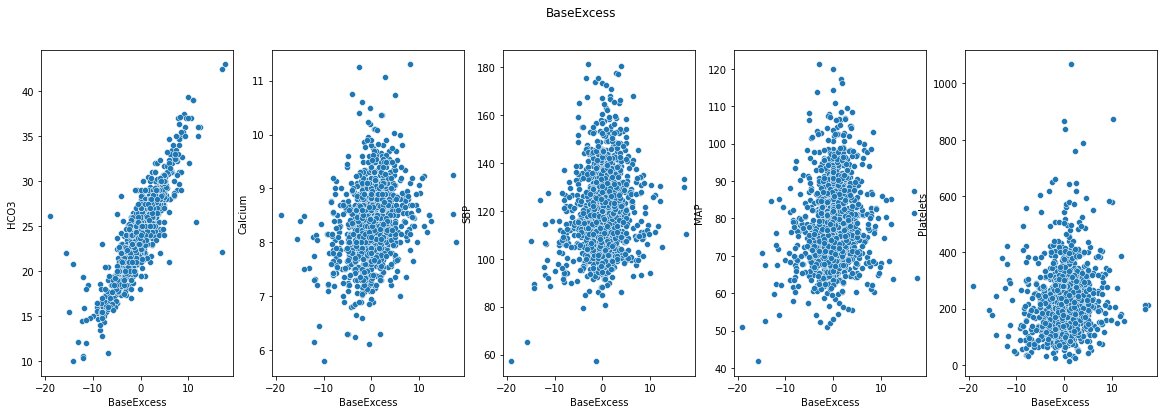

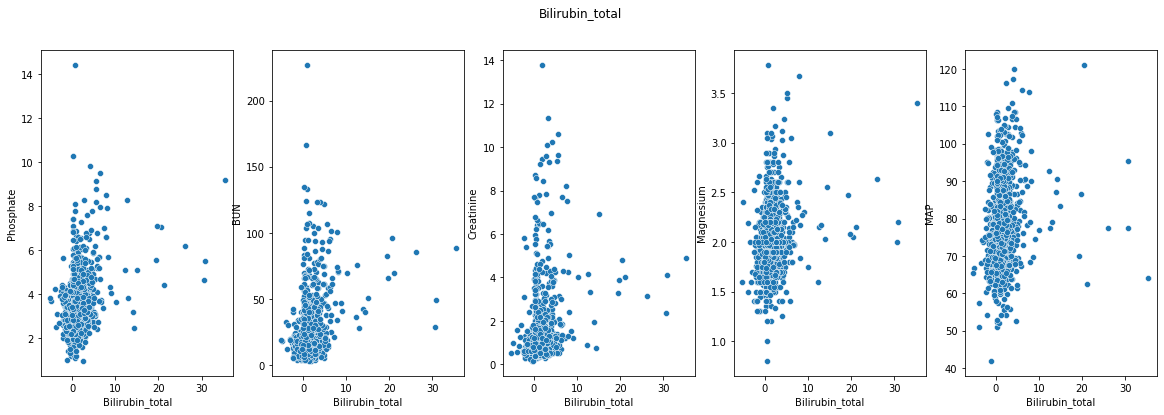

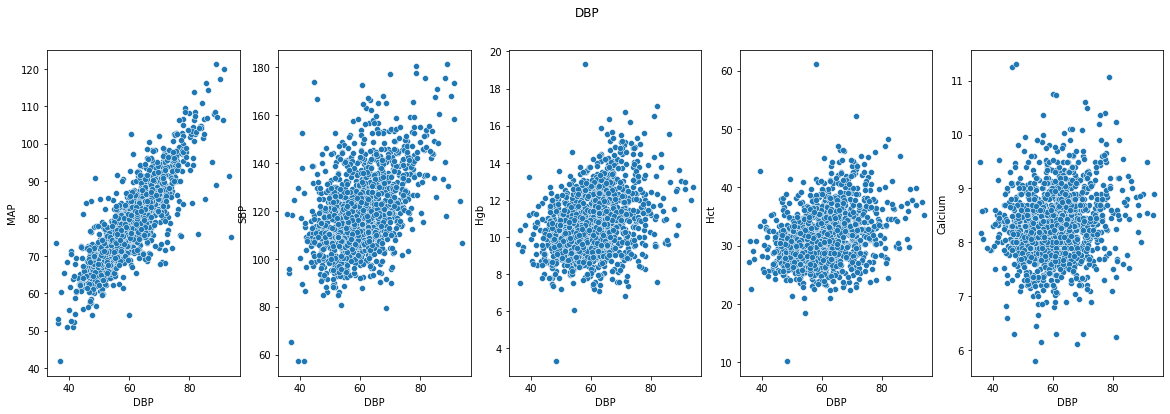

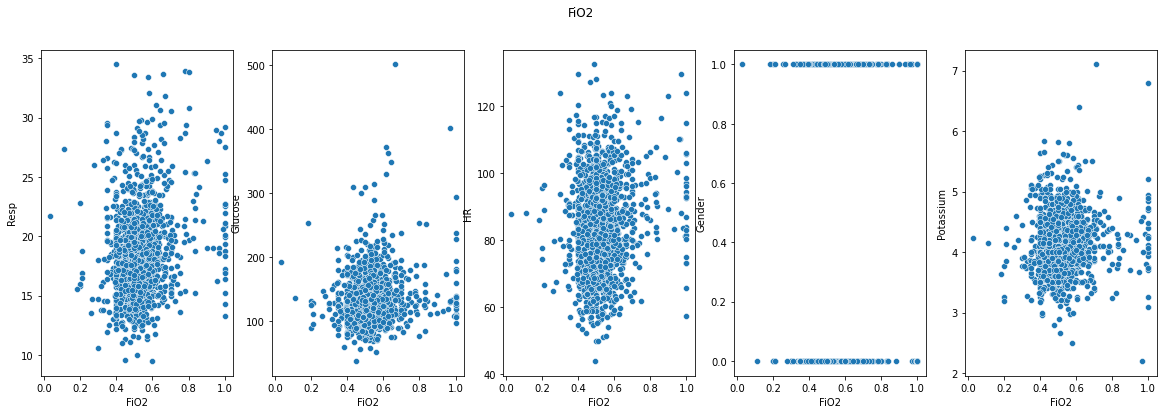

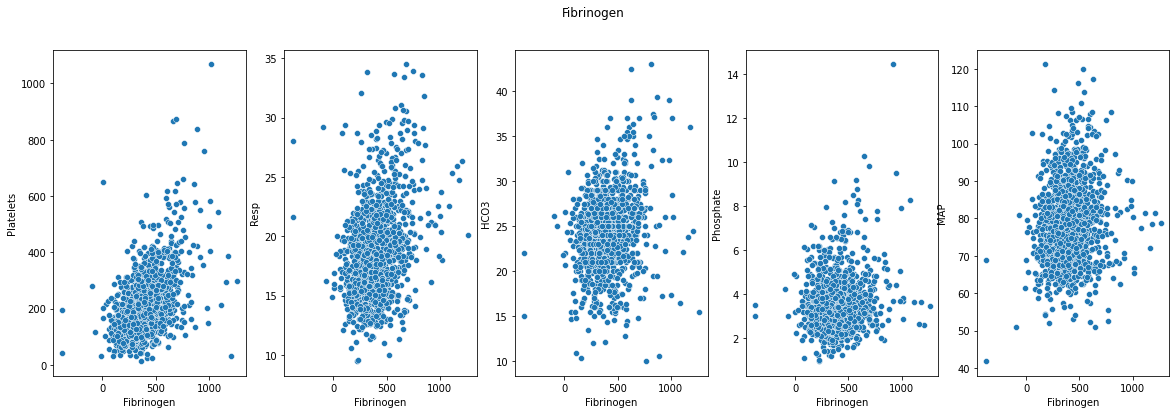

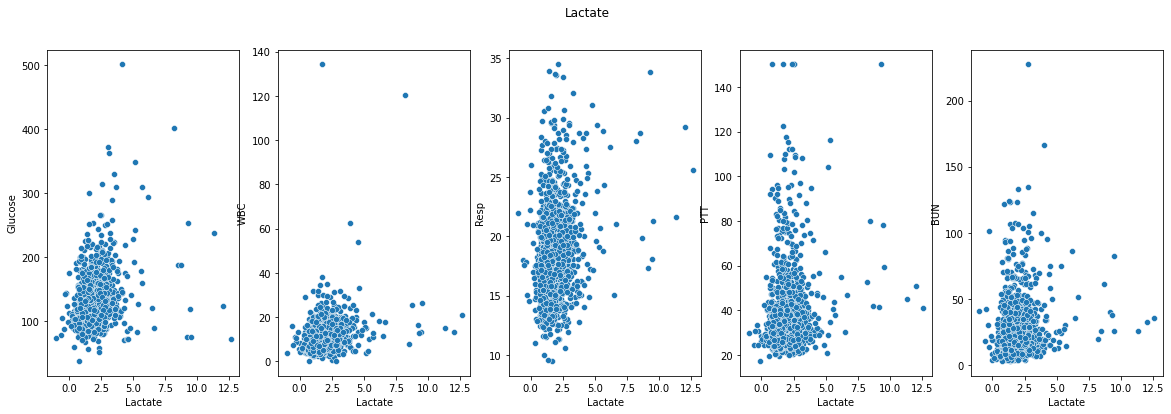

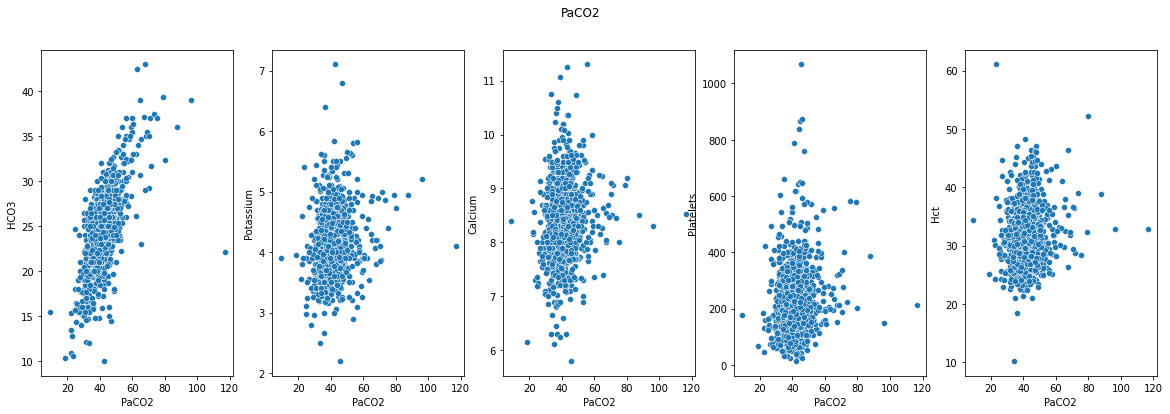

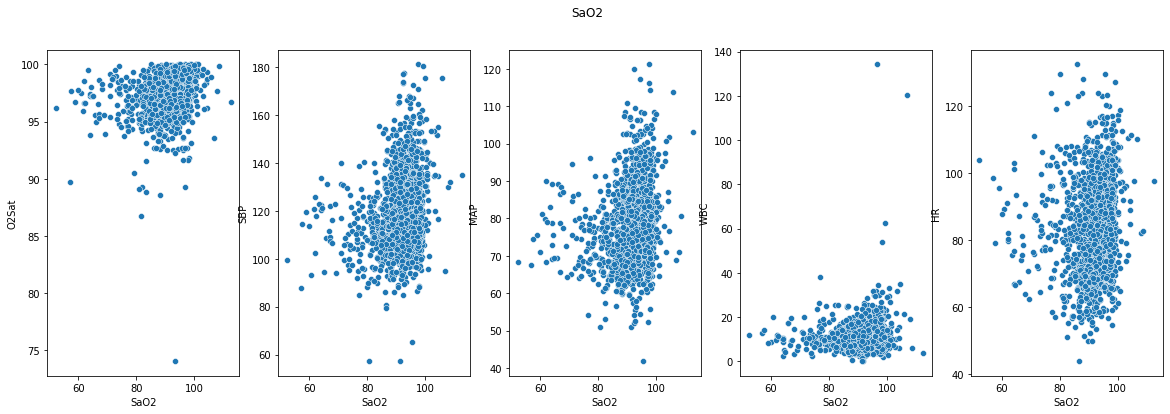

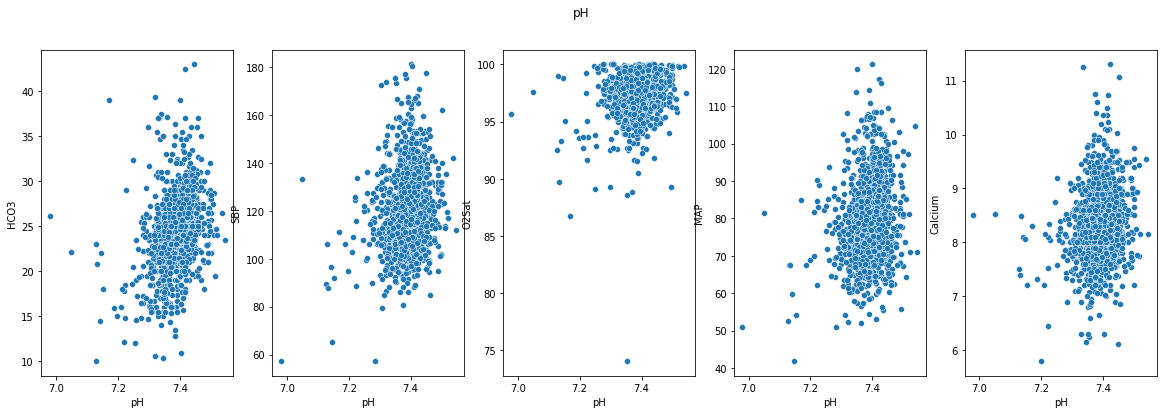

In [26]:
for col in more_than_thresh:
    list_and_col = remove_threshold(30)
    list_and_col.append(col)
    top5_graph(col, df_base[list_and_col])

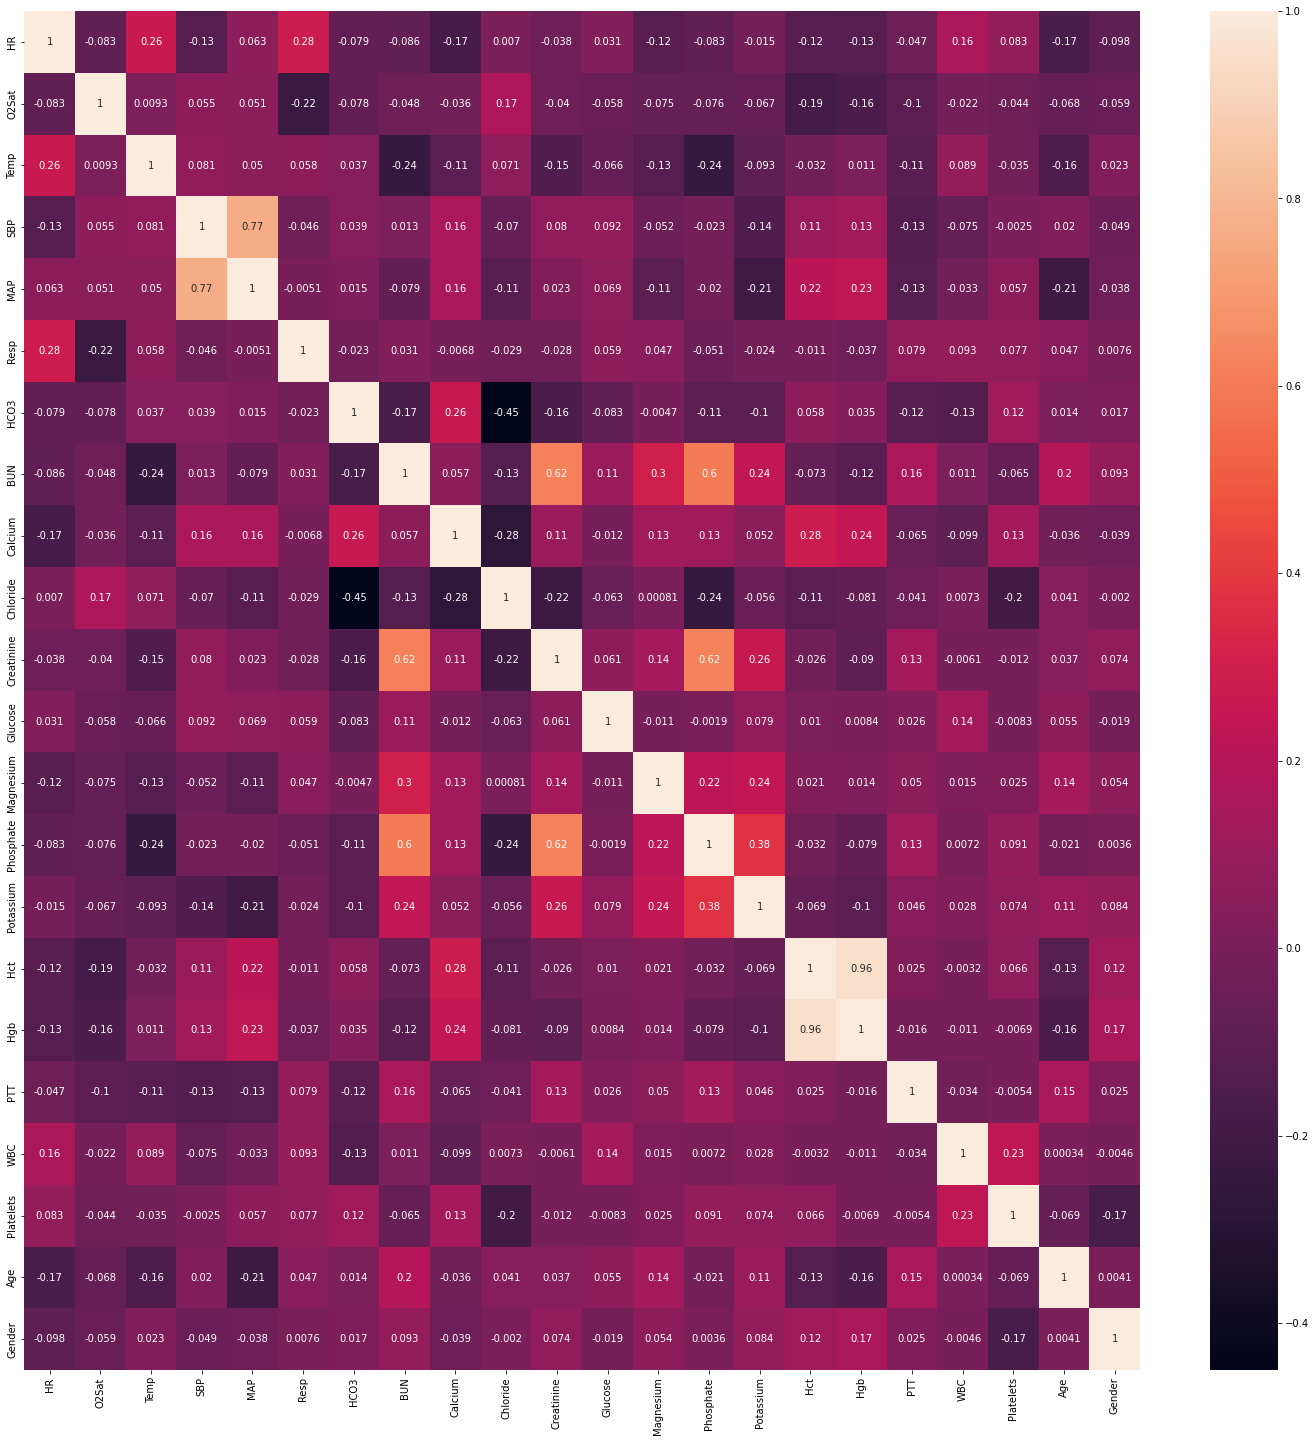

In [27]:
fig = plt.figure(figsize = (25,25))

sns.heatmap(df_prune.corr(), annot = True);

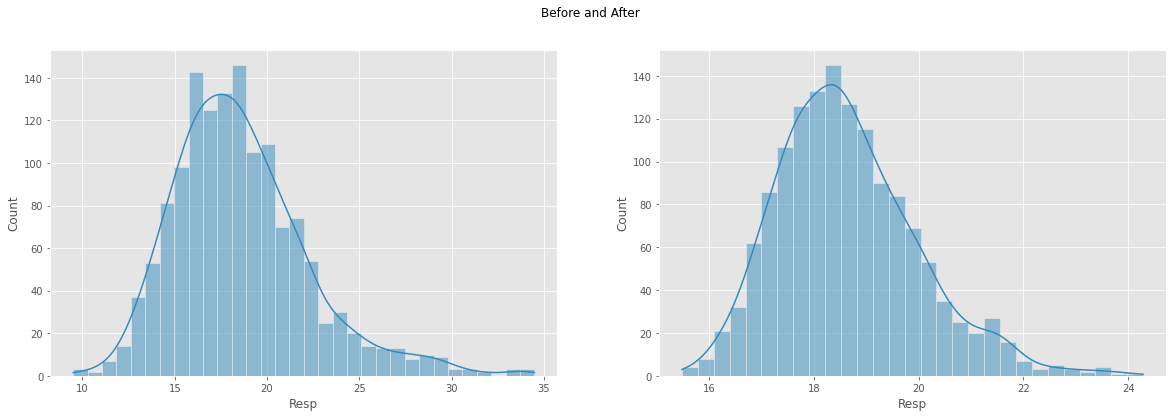

In [94]:
#random forest over decision tree

from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import VotingRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

seed = 42
list_columns = list(percent_null.sort_values()[percent_null <= 0].index)
list_columns.append("Resp")
df_five_perc = df_condensed[list_columns]
X = df_five_perc.drop(columns="Resp"); y = df_five_perc["Resp"].fillna(df_five_perc["Resp"].mean())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
estimators = []
model1 = LinearRegression(); estimators.append(("linear", model1))
model2 = LinearSVR(); estimators.append(("svm", model2))
model3 = RandomForestRegressor(max_depth=2); estimators.append(("cart2", model3))
model4 = RandomForestRegressor(max_depth=3); estimators.append(("cart3", model4))
model5 = RandomForestRegressor(max_depth=4); estimators.append(("cart4", model5))
model6 = RandomForestRegressor(max_depth=5); estimators.append(("cart5", model6))
model7 = KNeighborsRegressor(n_neighbors=2); estimators.append(("knn1", model7))
model8 = KNeighborsRegressor(n_neighbors=3); estimators.append(("knn2", model8))
model9 = KNeighborsRegressor(n_neighbors=4); estimators.append(("knn3", model9))

ensemble = VotingRegressor(estimators)
df_ensemble_test = X.copy()
df_ensemble_test["Resp"] = ensemble.fit(X, y).predict(X)
df_ensemble_test
before_after("Resp", df_ensemble_test)

In [110]:
def vote_ensemble(col, df, df_knn):
    df_temp = remove_all_nan(df)
    x = df_temp.drop(columns=col)
    y = df_temp[col]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
    estimators = []
    model1 = LinearRegression(); estimators.append(("linear", model1))
    model2 = LinearSVR(); estimators.append(("svm", model2))
    model3 = RandomForestRegressor(max_depth=2); estimators.append(("cart2", model3))
    model4 = RandomForestRegressor(max_depth=3); estimators.append(("cart3", model4))
    model5 = RandomForestRegressor(max_depth=4); estimators.append(("cart4", model5))
    model6 = RandomForestRegressor(max_depth=5); estimators.append(("cart5", model6))
    model7 = KNeighborsRegressor(n_neighbors=2); estimators.append(("knn1", model7))
    model8 = KNeighborsRegressor(n_neighbors=3); estimators.append(("knn2", model8))
    model9 = KNeighborsRegressor(n_neighbors=4); estimators.append(("knn3", model9))
    ensemble = VotingRegressor(estimators)
    return ensemble.fit(x, y).predict(df_knn.drop(columns=col))

def vote_ensemble_across(df):
    df_knn = perform_knn(df)
    df_return = pd.DataFrame()
    for col in df.columns:
        df_return[col] = vote_ensemble(col, df, df_knn)
    return df_return

df_with_nan = df_condensed.copy()
fill_nan_with_model(df_with_nan, vote_ensemble_across(df_with_nan))
df_with_nan

HR     O2Sat      Temp        SBP       MAP       DBP  \
patient                                                                 
p000040  96.000000 98.050000 36.665000  92.340909 72.280455 54.443492   
p000042 103.073770 96.918182 37.348182 117.562500 80.392857 60.434783   
p000043 119.190476 94.333333 35.742500  92.821429 74.194524 57.993111   
p000054  90.836364 95.129630 36.339231 104.154545 65.963636 54.462963   
p000056  89.000000 96.187500 36.682500 134.375000 84.625000 62.875000   
...            ...       ...       ...        ...       ...       ...   
p020609 107.729167 99.500000 37.028333 115.354167 87.666667 70.104167   
p020620  95.190000 97.781250 36.680833 125.000000 81.680000 62.568182   
p020621  61.789474 94.916667 36.777500 150.526316 96.508947 66.964793   
p020634  86.600000 96.525000 37.310000 105.150000 67.641500 52.900000   
p020635  68.675000 96.175000 36.883000 127.706897 82.050000 63.982759   

             Resp  BaseExcess      HCO3     FiO2  ...  Potassium  \
patient                                           ...              
p000040 21.021739   -1.646201 23.500000 0.561105  ...   5.200000   
p000042 16.919355    1.250000 24.200000 0.500000  ...   3.412500   
p000043 24.773810    6.500000 33.500000 0.615538  ...   3.500000   
p000054 20.054545   -0.712345 24.000000 0.515352  ...   4.266667   
p000056 15.937500   -3.150520 21.000000 0.500000  ...   4.300000   
...           ...         ...       ...      ...  ...        ...   
p020609 12.354167    0.749216 30.000000 0.500000  ...   3.600000   
p020620 19.530612   -0.263158 23.000000 0.497059  ...   4.475000   
p020621 18.400000   -1.231499 25.000000 0.413384  ...   4.200000   
p020634 16.537500    2.000000 27.000000 0.540000  ...   4.183333   
p020635 15.500000    0.000000 24.000000 0.497557  ...   3.700000   

         Bilirubin_total       Hct       Hgb       PTT       WBC  Fibrinogen  \
patient                                                                        
p000040         2.453833 29.550000  9.350000 34.092588  8.400000  687.799516   
p000042         0.700000 29.835714  9.914286 28.540000 10.100000  652.000000   
p000043         1.400000 33.900000  9.966667 29.133333  7.750000  758.945379   
p000054         0.750000 34.233333 11.200000 34.300000 18.200000  732.144260   
p000056         4.352922 21.100000  7.400000 22.500000 15.400000  342.340138   
...                  ...       ...       ...       ...       ...         ...   
p020609         4.813433 27.200000  9.050000 41.469635 13.700000  232.913933   
p020620         7.021710 38.100000 11.300000 94.816667 11.500000  286.164737   
p020621         2.430681 45.400000 16.200000 28.177023  7.000000  414.892336   
p020634         2.494213 28.150000  9.950000 30.000000  8.300000  391.375462   
p020635         0.655819 28.700000 10.100000 39.950000  9.000000  599.594773   

         Platelets       Age   Gender  
patient                                
p000040 332.000000 57.170000 1.000000  
p000042 368.833333 63.590000 0.000000  
p000043 345.000000 46.350000 0.000000  
p000054 544.666667 70.510000 1.000000  
p000056 167.000000 68.200000 1.000000  
...            ...       ...      ...  
p020609 170.000000 38.170000 0.000000  
p020620 139.000000 69.980000 1.000000  
p020621 206.000000 81.600000 1.000000  
p020634 224.500000 57.260000 1.000000  
p020635 301.000000 56.750000 1.000000  

[1411 rows x 33 columns]

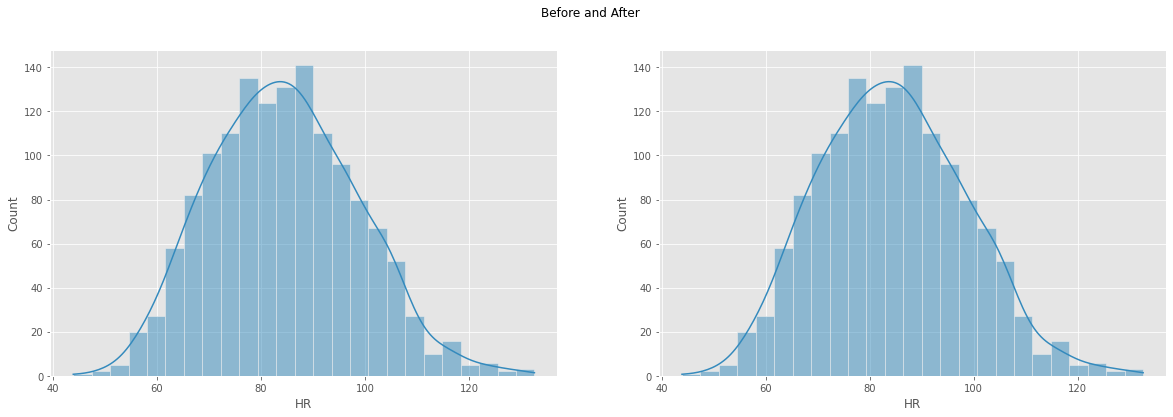

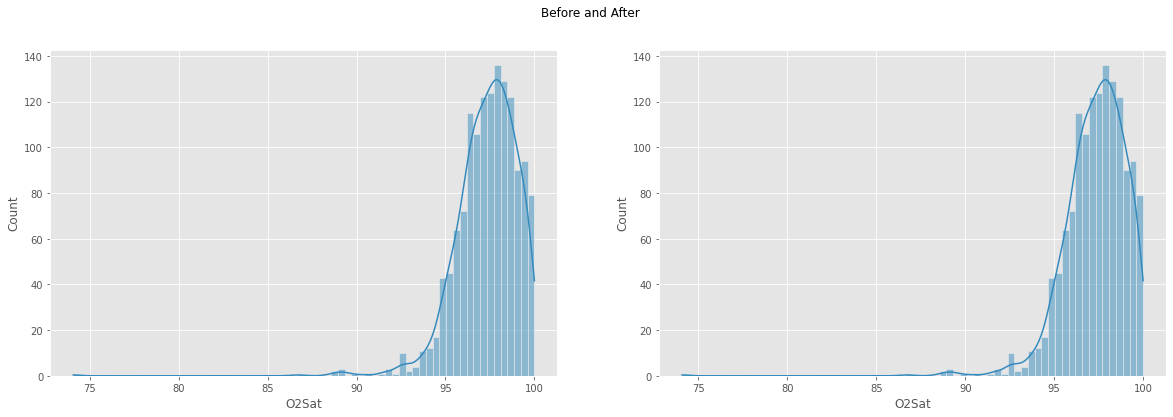

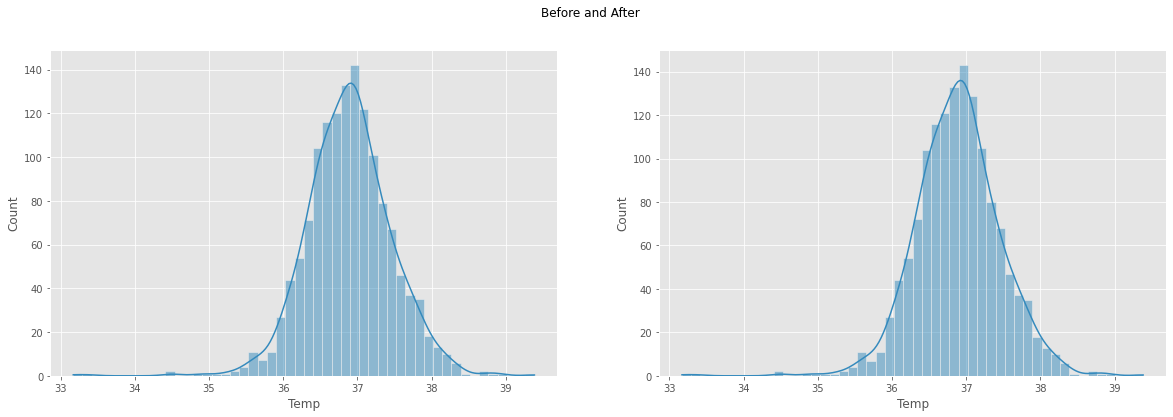

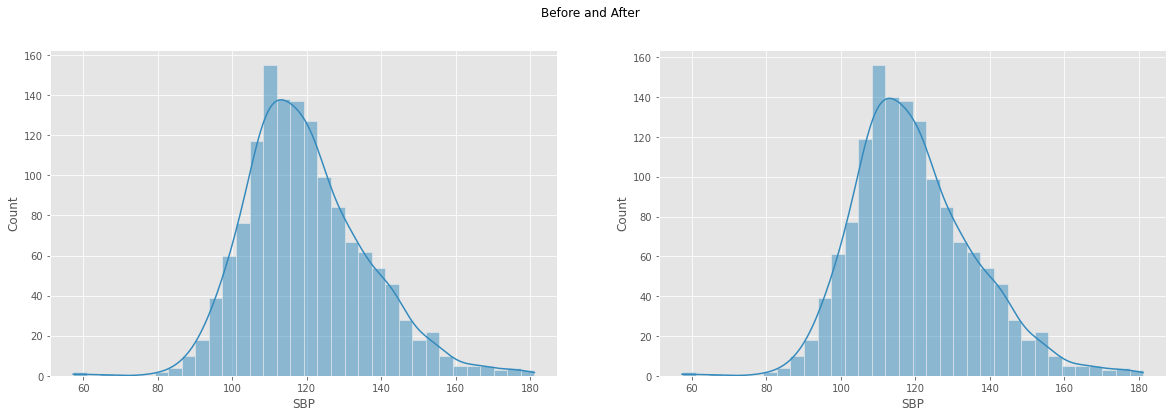

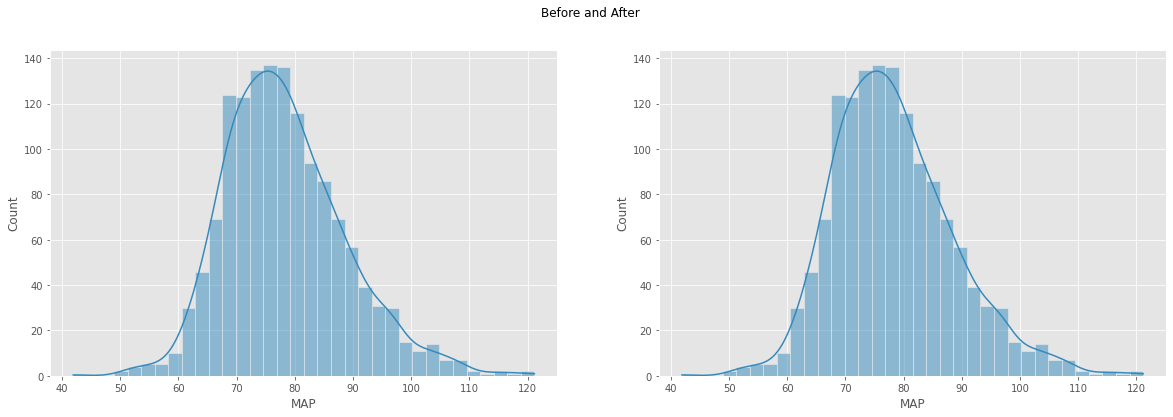

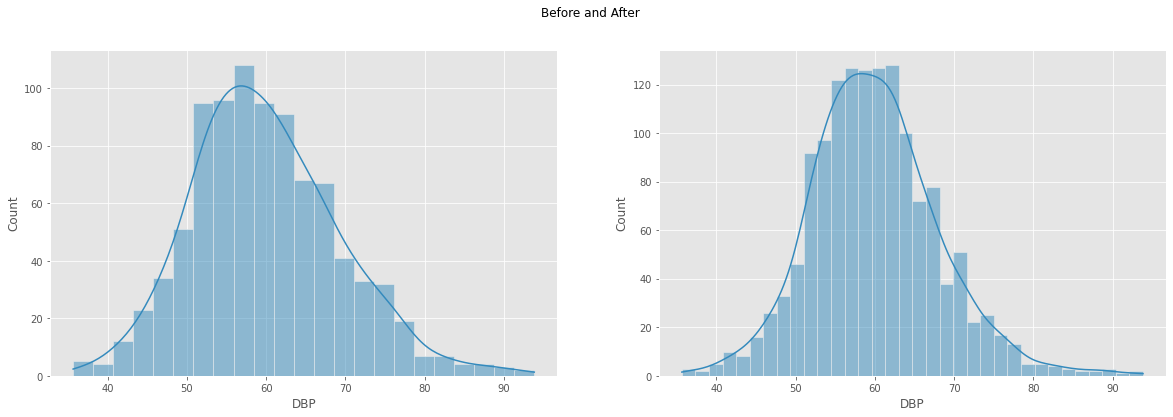

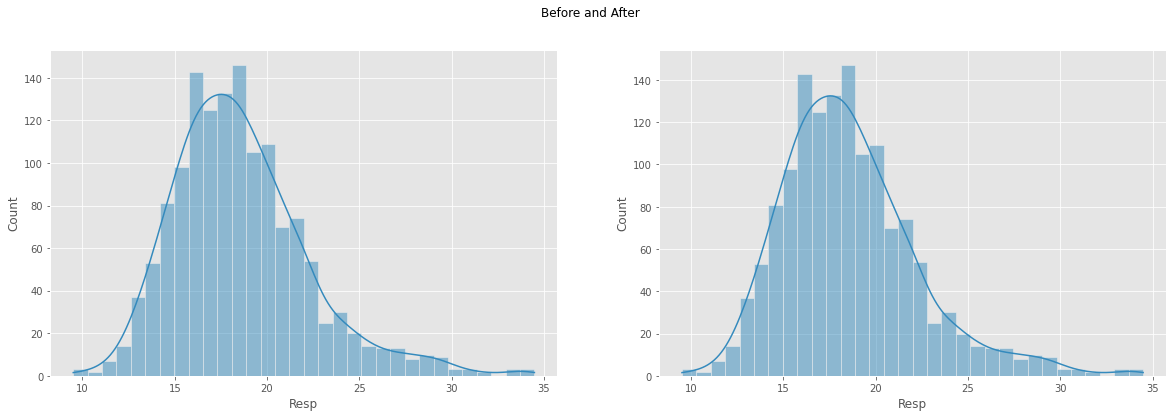

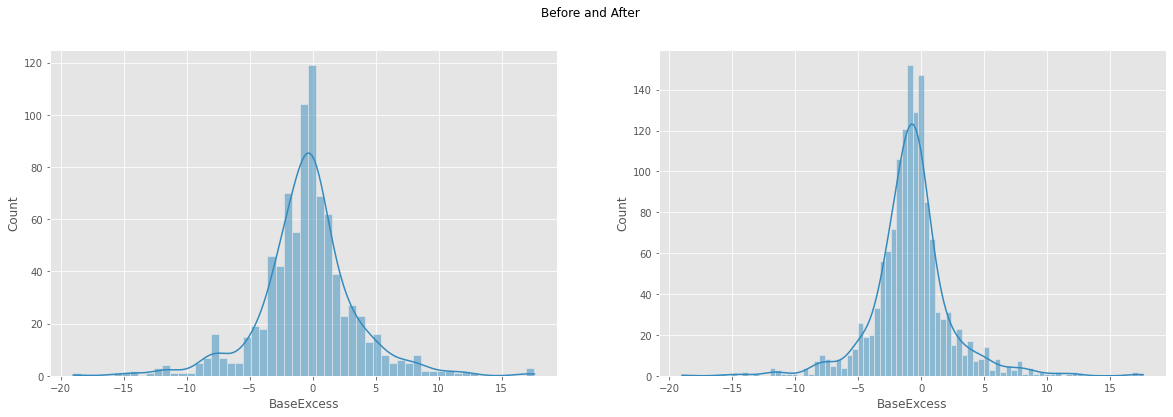

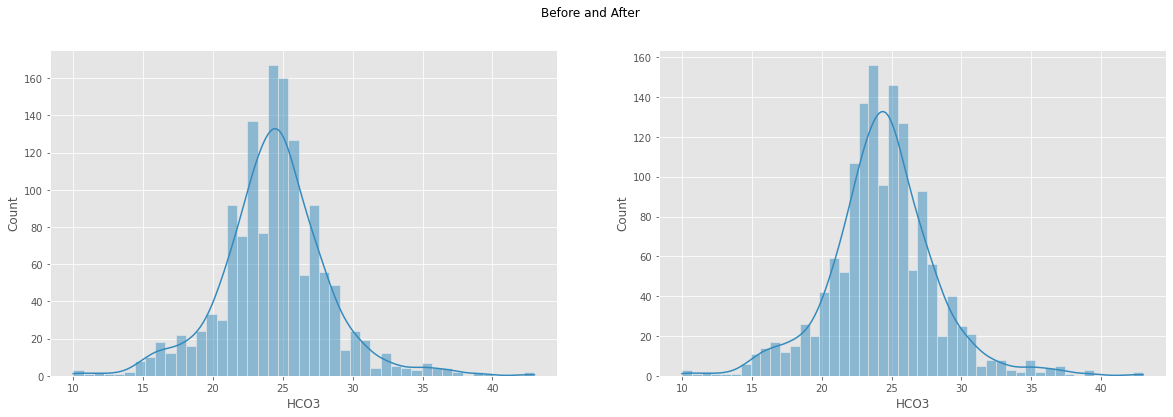

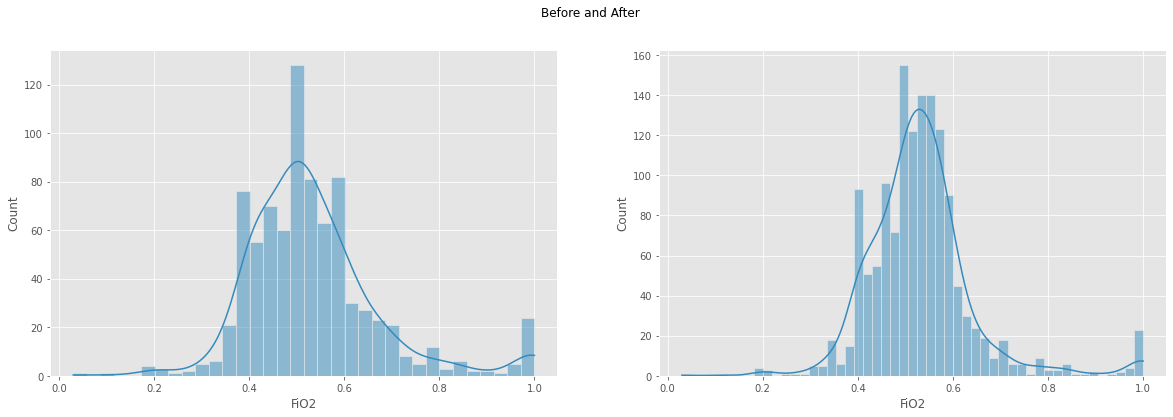

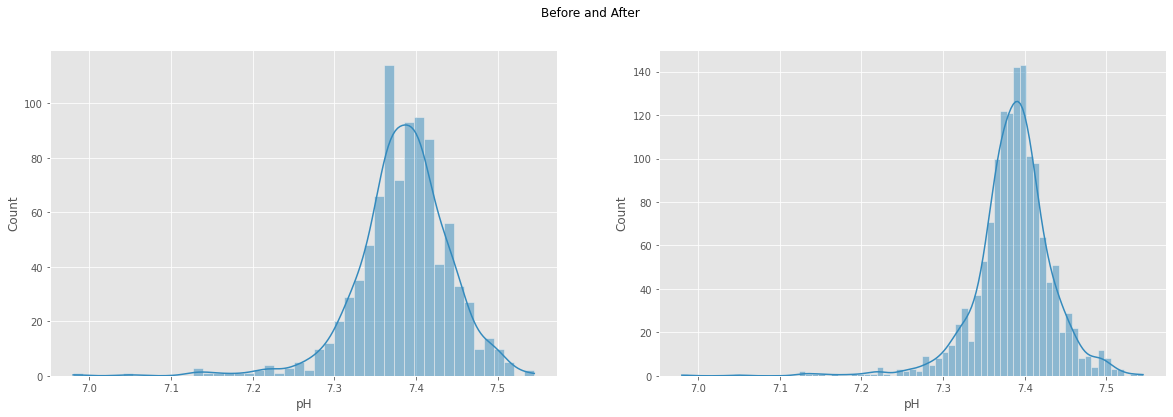

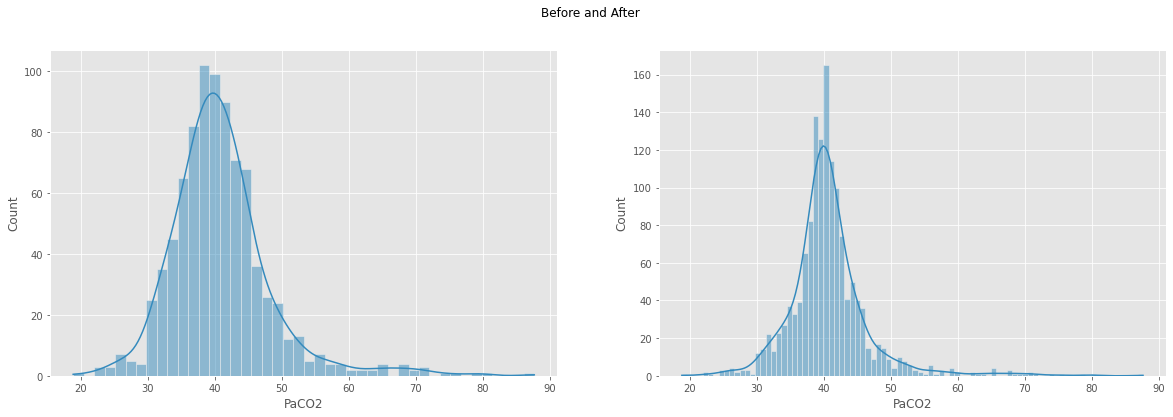

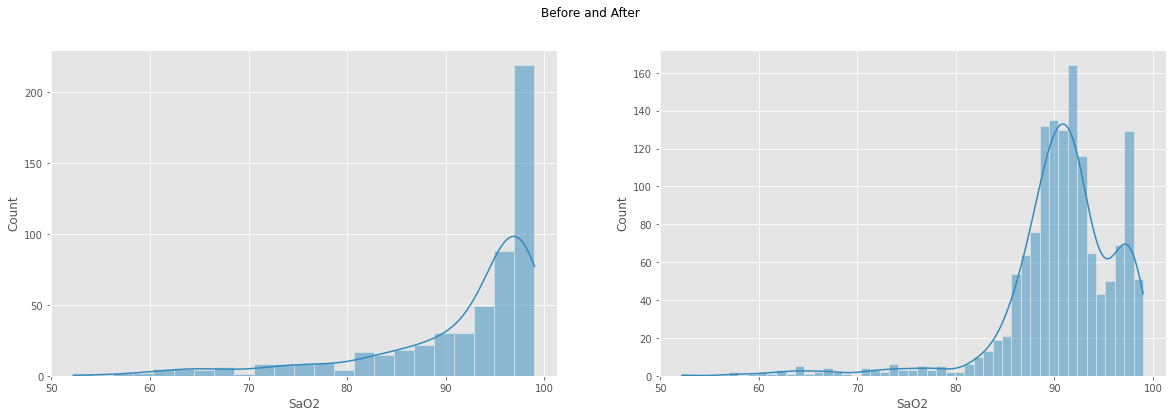

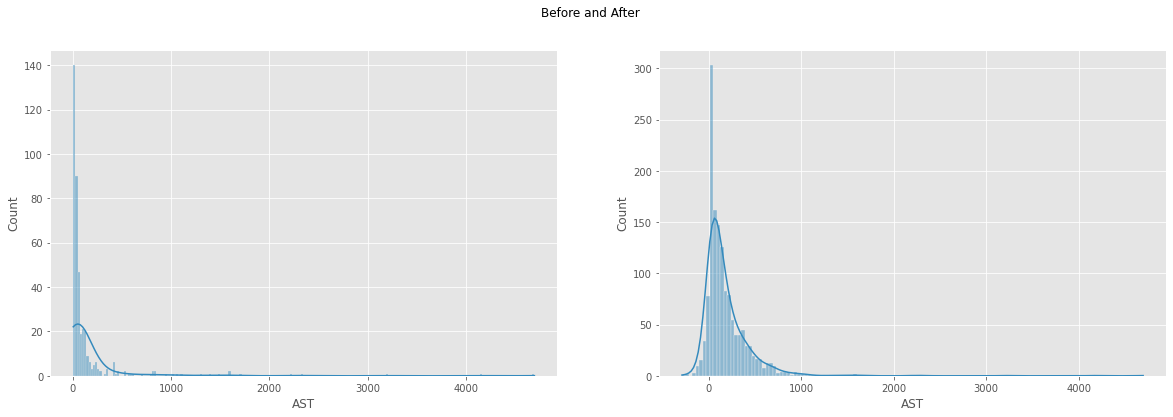

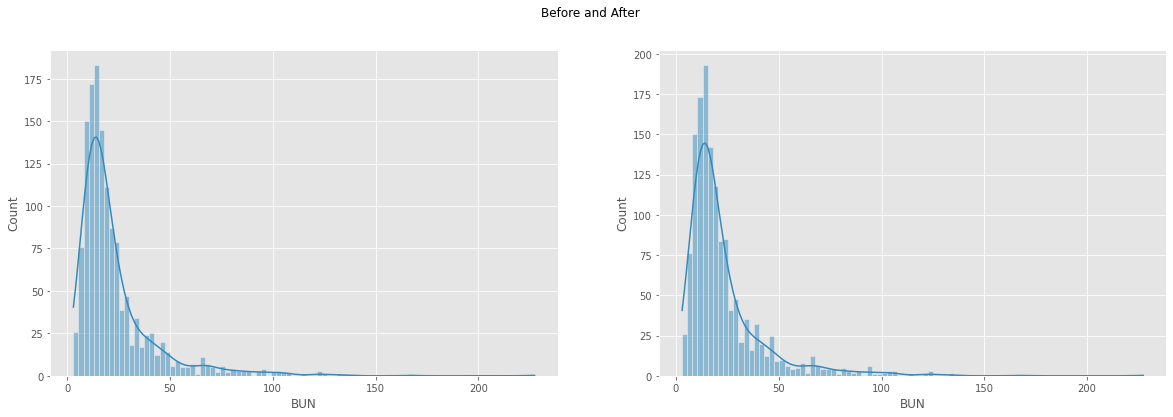

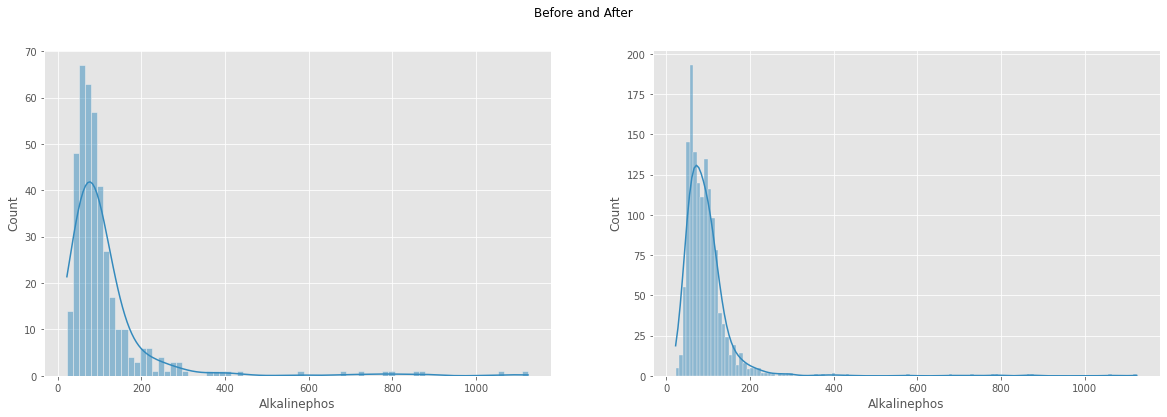

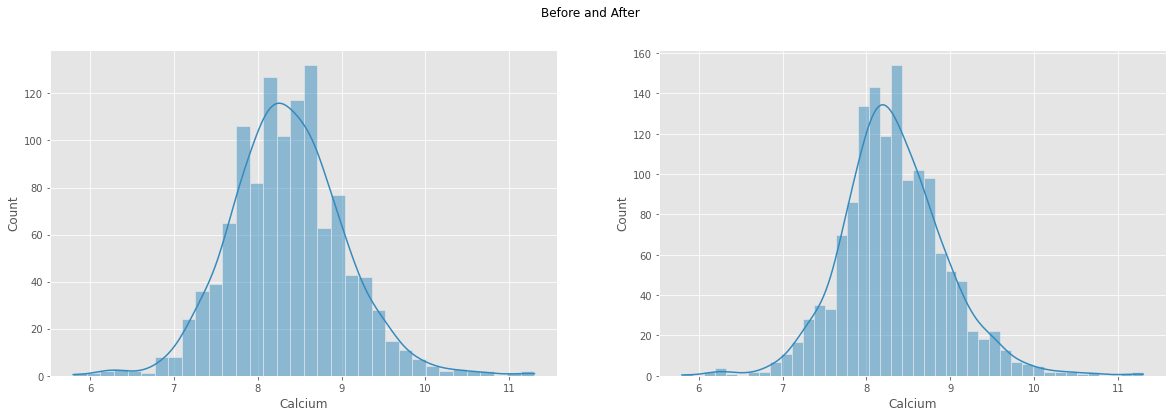

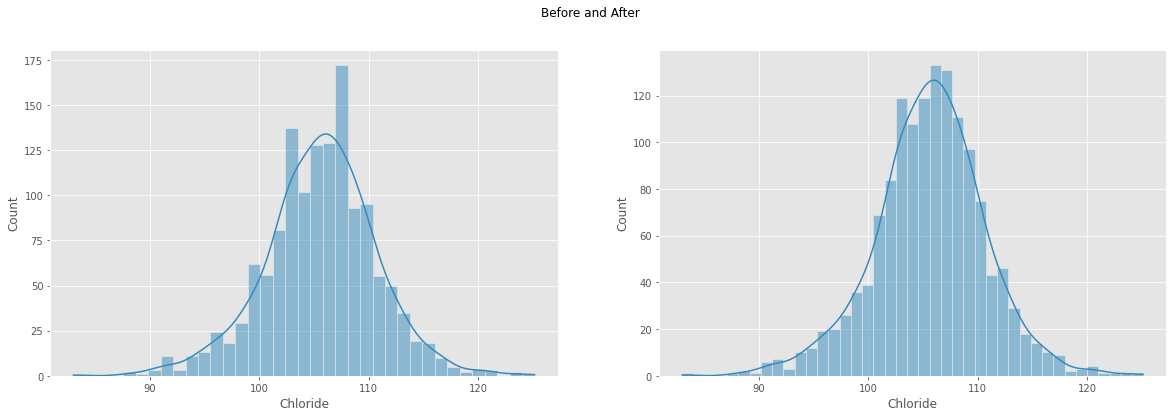

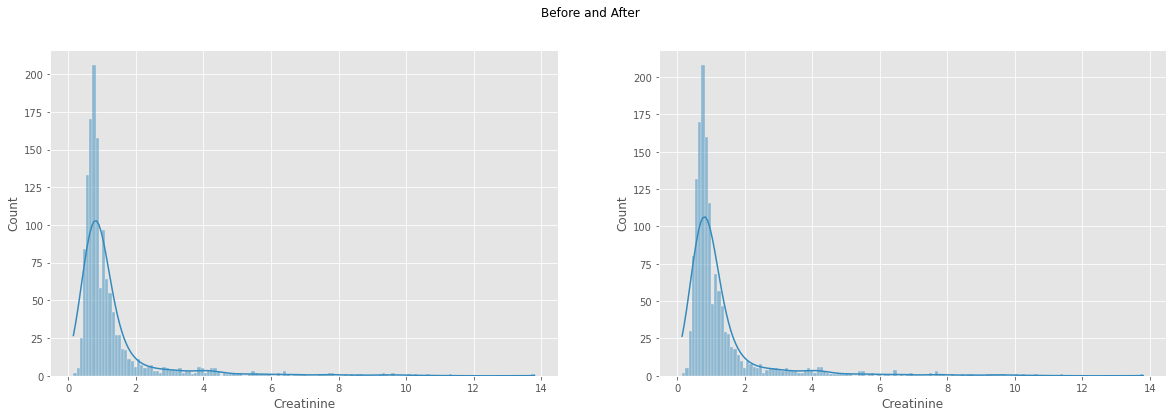

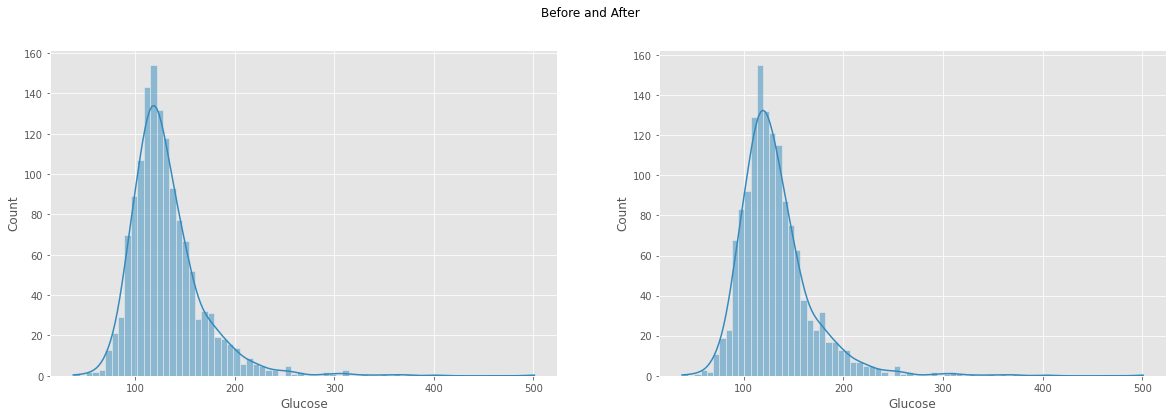

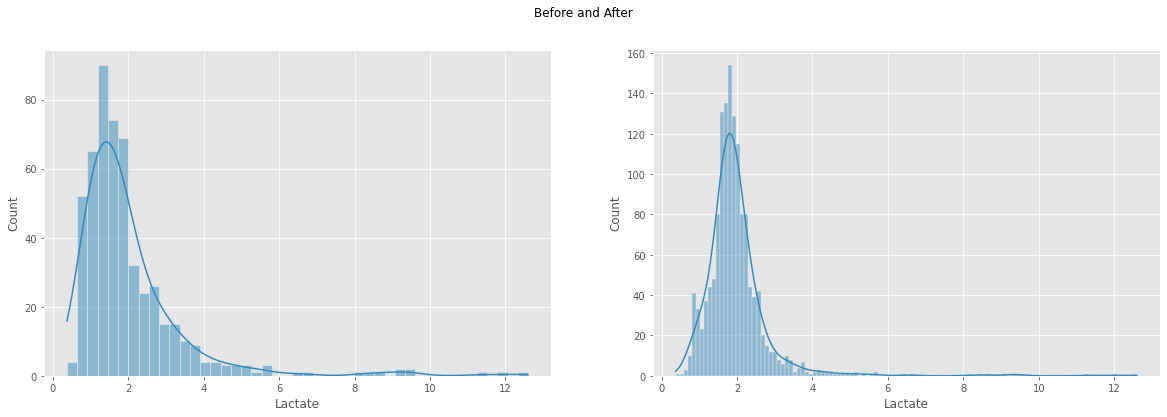

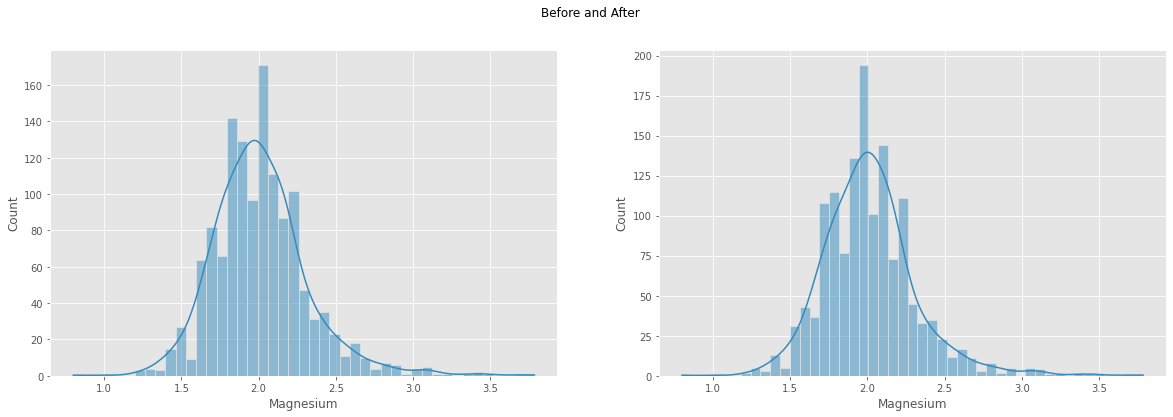

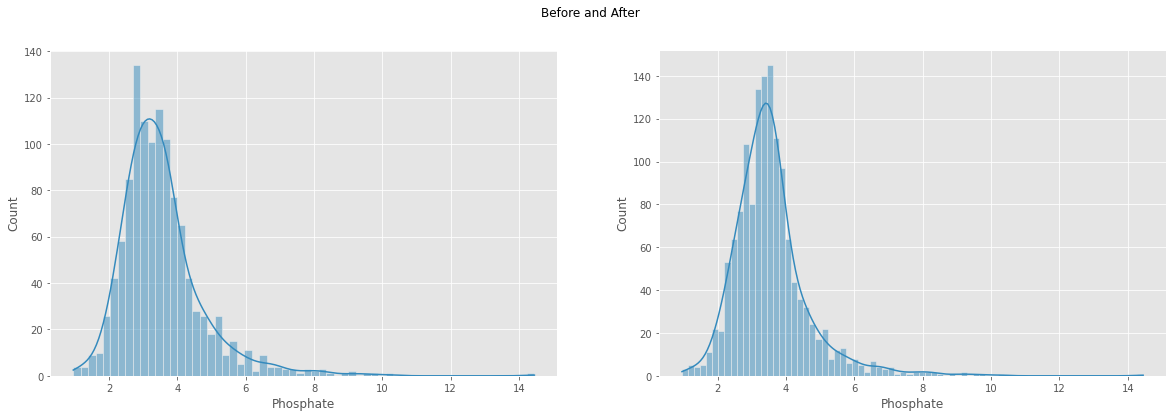

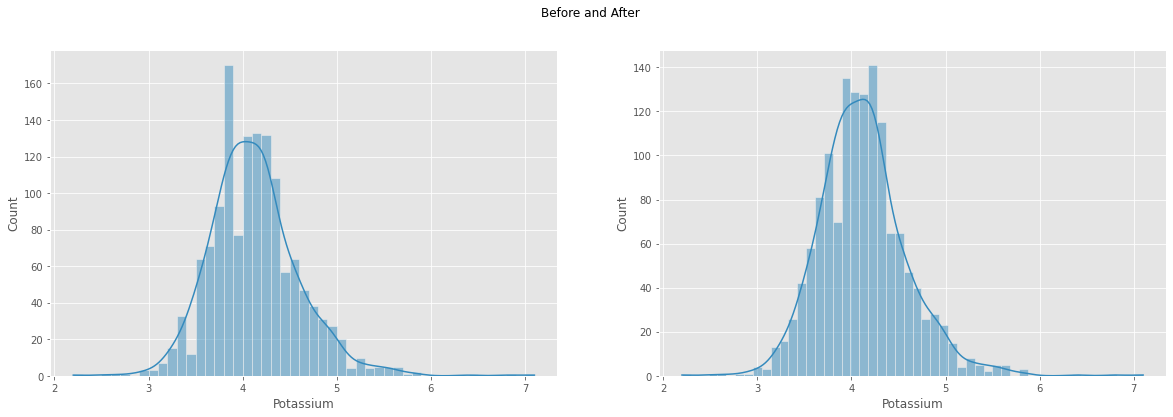

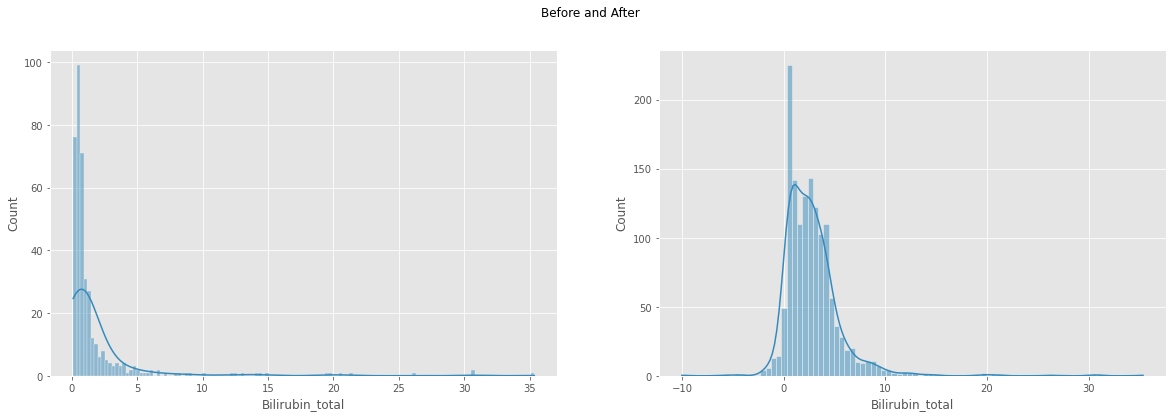

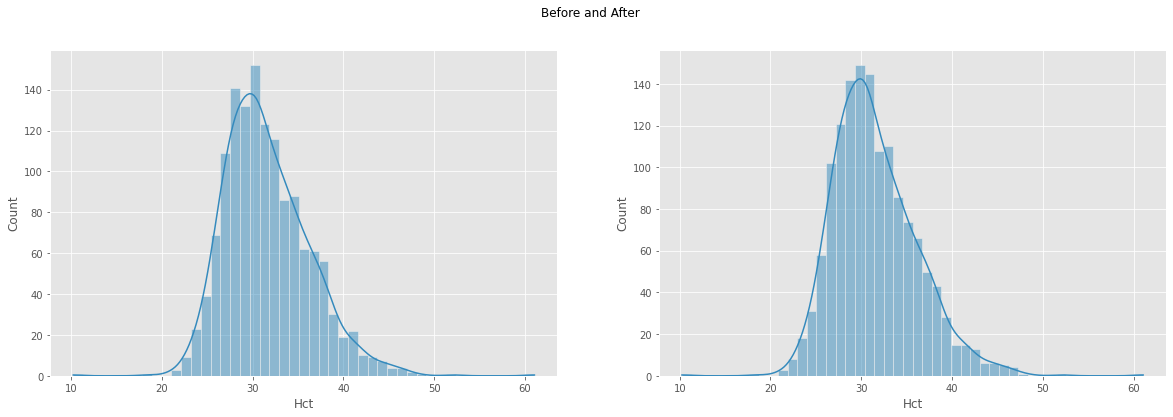

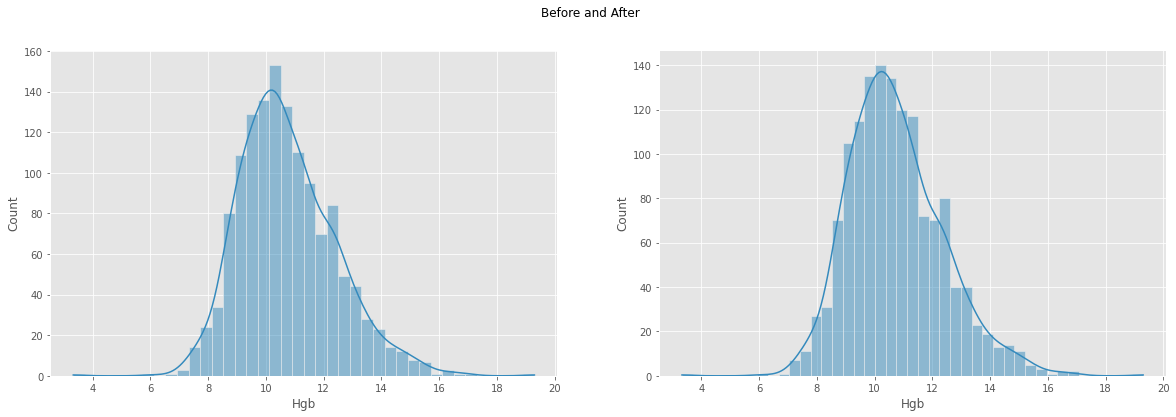

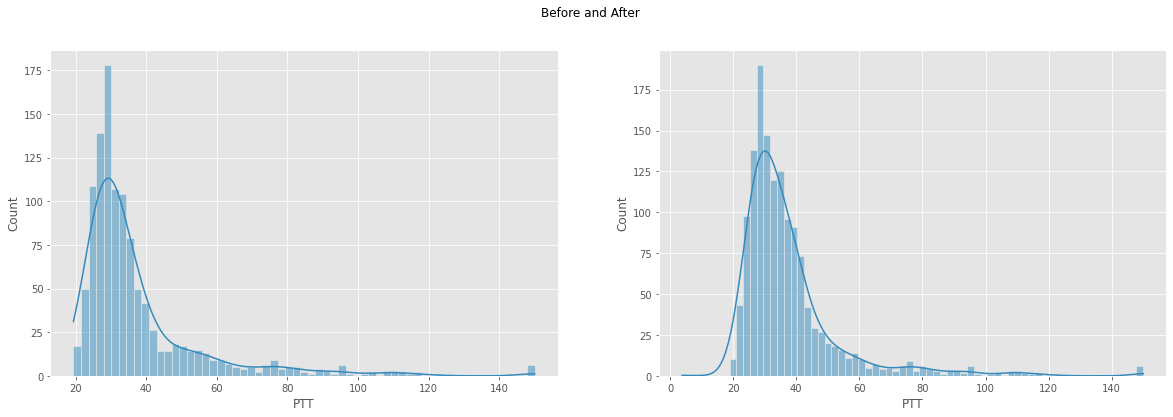

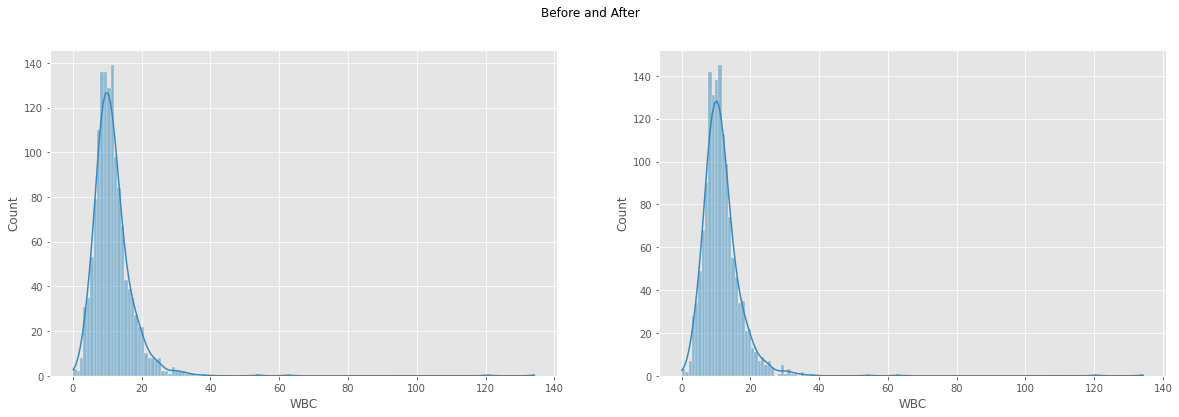

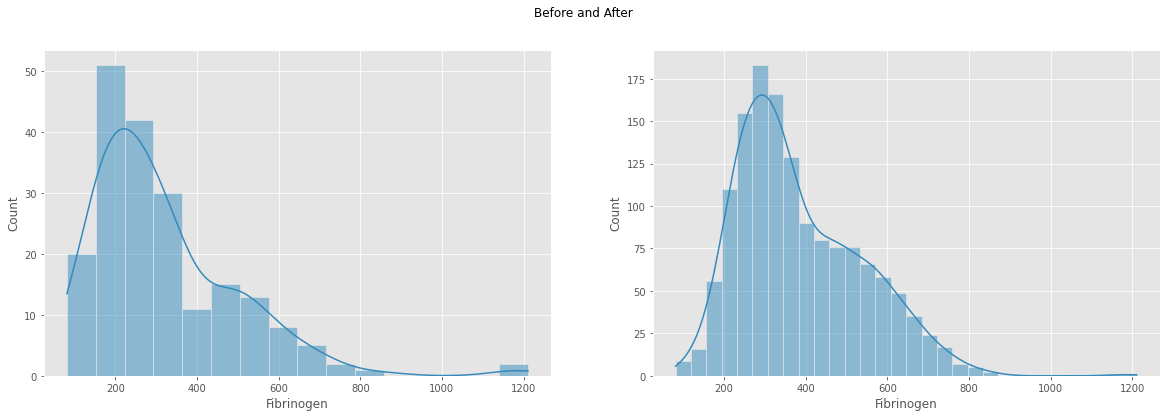

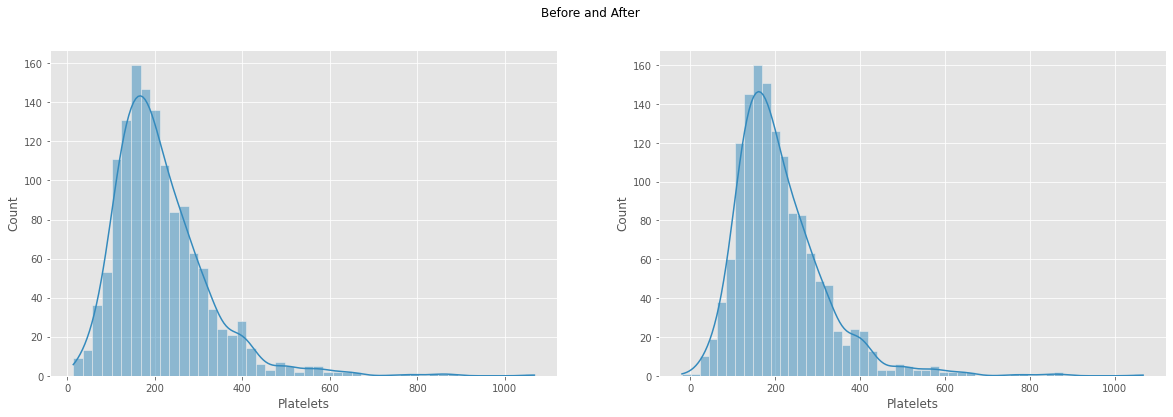

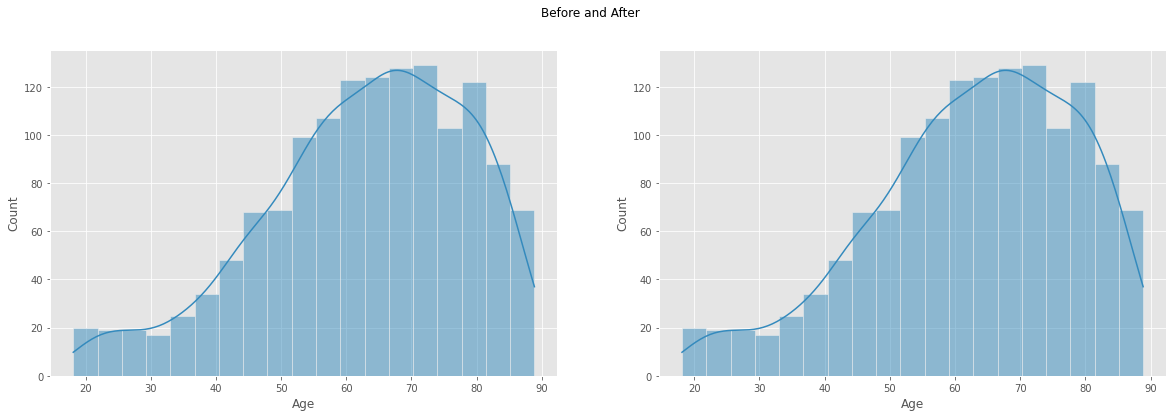

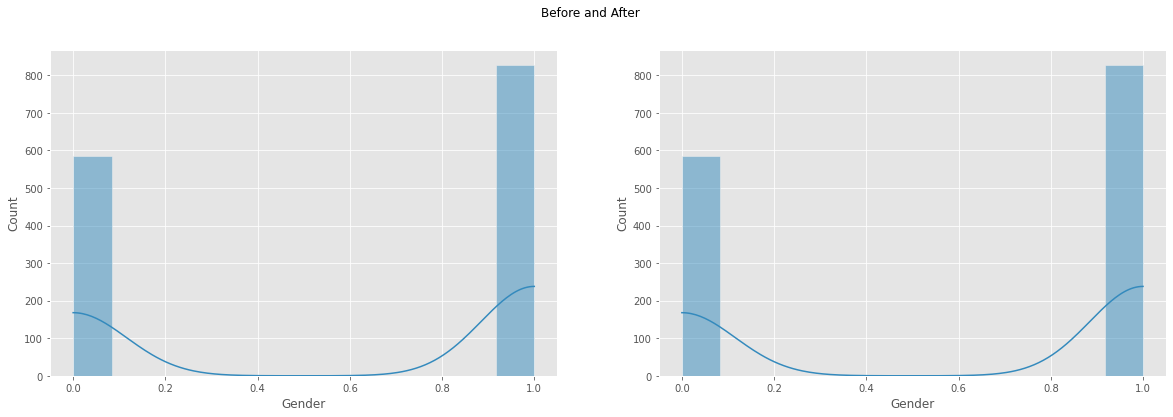

In [111]:
for col in df_with_nan.columns:
    before_after(col, df_with_nan)

In [34]:
os.makedirs('out', exist_ok=True)  
df_with_nan.to_csv('out/ensemble.csv')